In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df=pd.read_csv("advance_regression_train.csv")

In [3]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
df.shape

(1460, 81)

In [6]:
df['MSZoning'].value_counts()


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [7]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

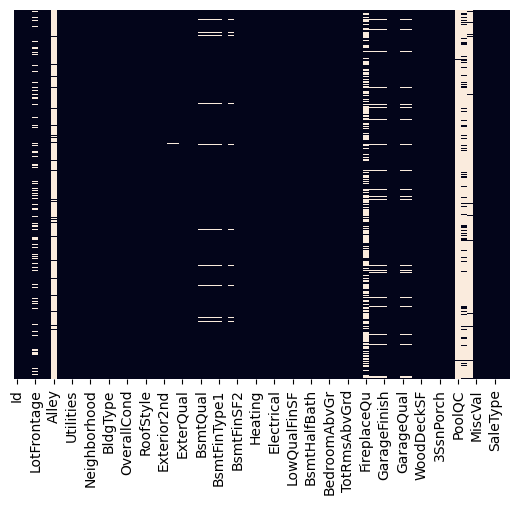

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
lotfrontage=df["LotFrontage"].mean()
lotfrontage

70.04995836802665

In [11]:
df["LotFrontage"]=df["LotFrontage"].fillna(lotfrontage)

In [12]:
df["LotFrontage"].isnull().sum()

0

In [13]:
df.drop(["Alley"],axis="columns",inplace=True)

In [14]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1455         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1456         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1458         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0      2    2008        WD         Normal     208500  
1          0      5    2007        WD         Normal     181500  
2          0      9    2008        WD         Normal     223500  
3          0      2    2006        WD        Abnorml     140000  
4          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1455       0      8    2007        WD         Normal     175000  
1456       0      2    2010        WD         Normal     210000  
1457    2500      5    2010        WD         Normal     266500  
1458       0      4    2010        WD         Normal     142125  
1459       0      6    2008        WD         Normal     147500  

[1460 rows x 80 columns]

In [15]:
bsmt_cond=df['BsmtCond'].mode()[0]
bsmt_cond

'TA'

In [16]:
df['BsmtCond']=df['BsmtCond'].fillna(bsmt_cond)

In [17]:
df['BsmtCond'].isnull().sum()

0

In [18]:
#you can also do that this method of fillna

df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [19]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [20]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [21]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [22]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [23]:
df.shape

(1460, 76)

In [24]:
df.drop(['Id'],axis=1,inplace=True)

In [25]:



df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [26]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

<AxesSubplot:>

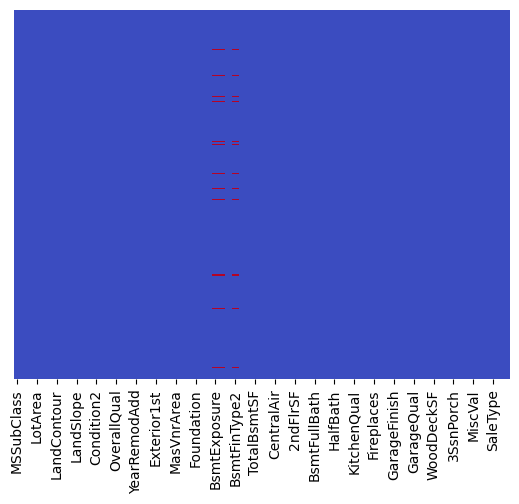

In [27]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [28]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

<AxesSubplot:>

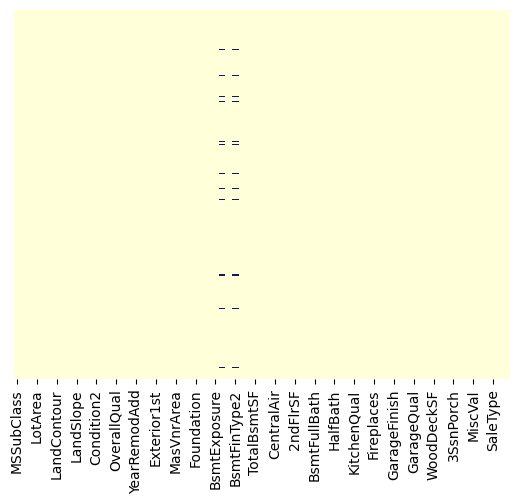

In [29]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [30]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [31]:
#drop all the na values
df.dropna(inplace=True)

In [32]:
df.shape

(1422, 75)

In [33]:
df.head()


MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0       0       2    2008        WD         Normal    208500  
1        0       0       5    2007        WD         Normal    181500  
2        0       0       9    2008        WD         Normal    223500  
3        0       0       2    2006        WD        Abnorml    140000  
4        0       0      12    2008        WD         Normal    250000  

[5 rows x 75 columns]

(0.0, 791005.0)

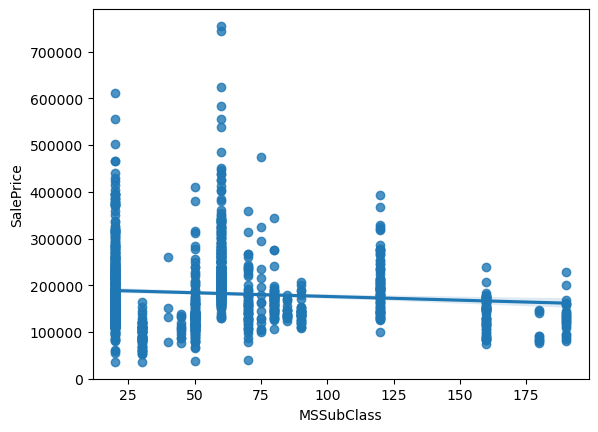

In [34]:
sns.regplot(x="MSSubClass", y="SalePrice", data=df)
plt.ylim(0,)

In [35]:
df[["MSSubClass","SalePrice"]].corr()

MSSubClass  SalePrice
MSSubClass    1.000000  -0.084471
SalePrice    -0.084471   1.000000

(0.0, 791005.0)

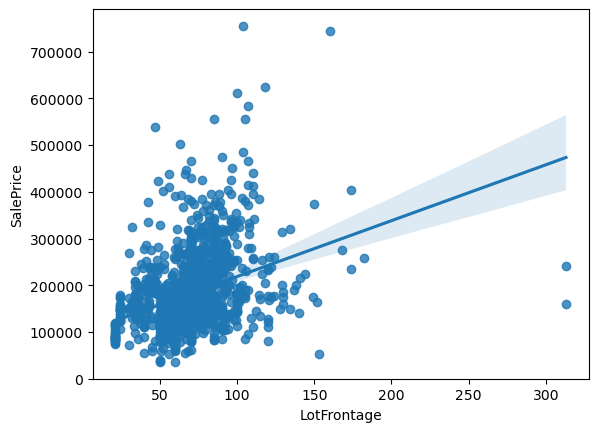

In [36]:
sns.regplot(x="LotFrontage", y="SalePrice", data=df)
plt.ylim(0,)

In [37]:
df[["LotFrontage","SalePrice"]].corr()

LotFrontage  SalePrice
LotFrontage     1.000000   0.335397
SalePrice       0.335397   1.000000

(0.0, 791005.0)

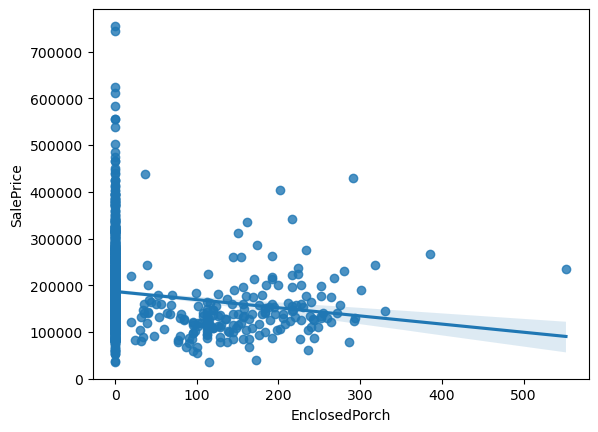

In [38]:
sns.regplot(x="EnclosedPorch", y="SalePrice", data=df)
plt.ylim(0,)

(0.0, 791005.0)

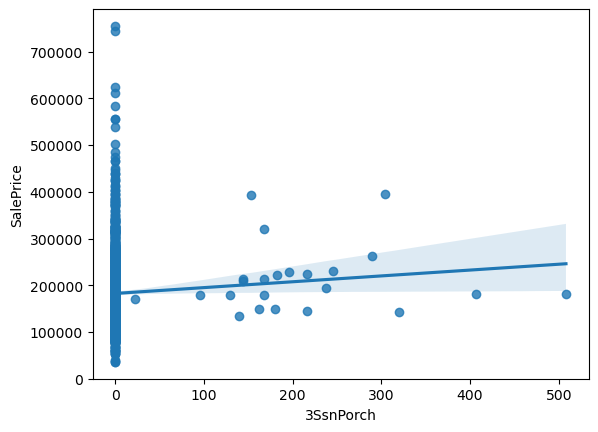

In [39]:
sns.regplot(x="3SsnPorch", y="SalePrice", data=df)
plt.ylim(0,)

(0.0, 791005.0)

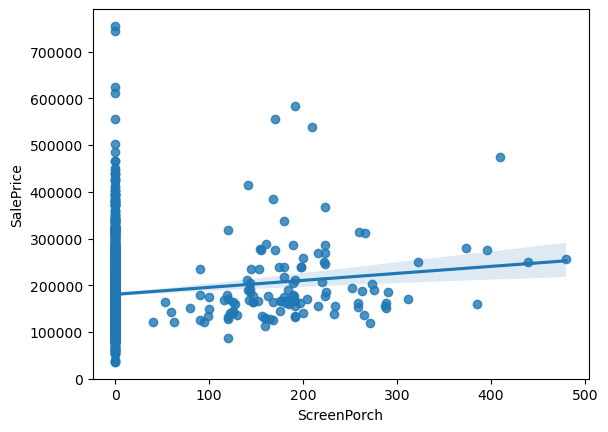

In [40]:
sns.regplot(x="ScreenPorch", y="SalePrice", data=df)
plt.ylim(0,)

(0.0, 791005.0)

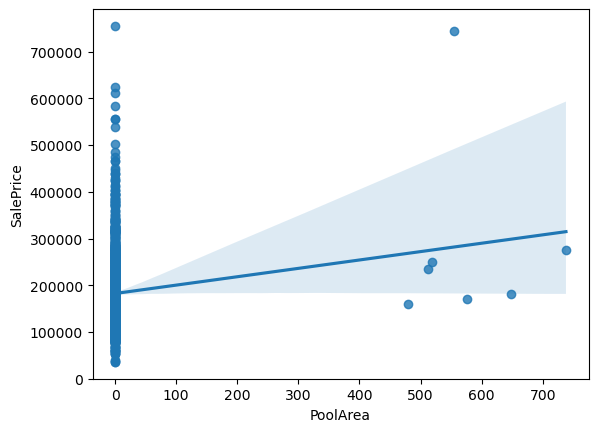

In [41]:
sns.regplot(x="PoolArea", y="SalePrice", data=df)
plt.ylim(0,)

(0.0, 802125.1165233547)

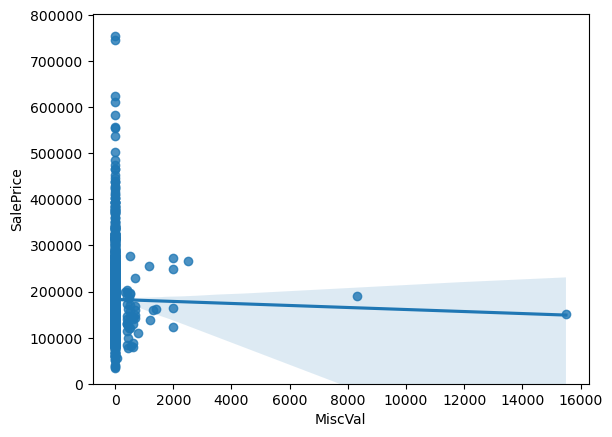

In [42]:
sns.regplot(x="MiscVal", y="SalePrice", data=df)
plt.ylim(0,)

(0.0, 1136010.5286213176)

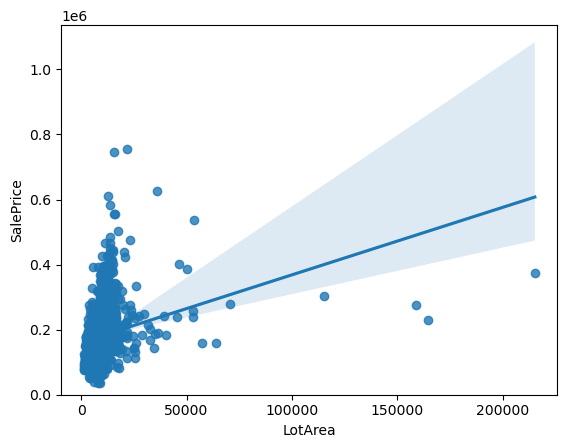

In [43]:
sns.regplot(x="LotArea", y="SalePrice", data=df)
plt.ylim(0,)

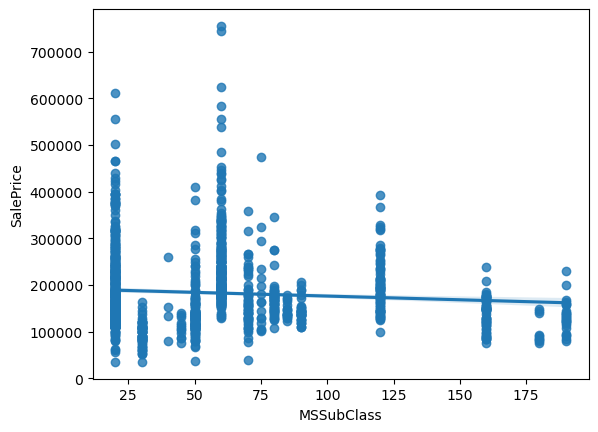

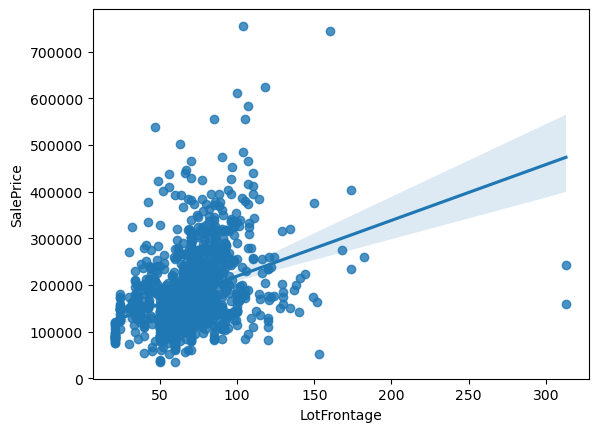

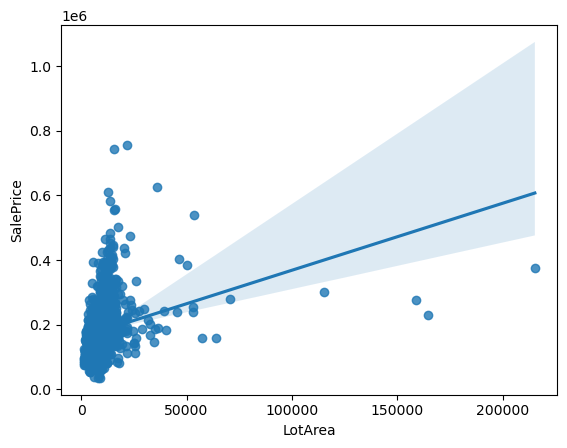

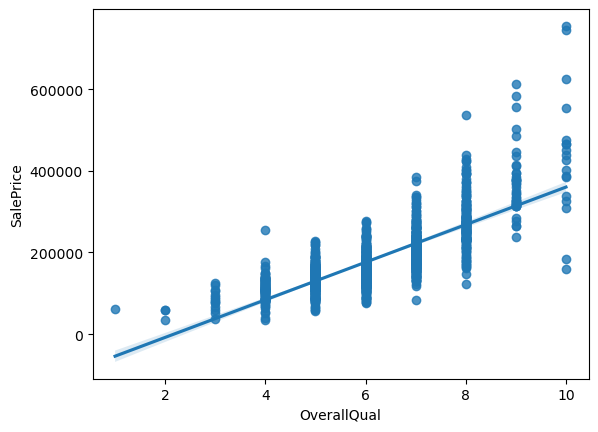

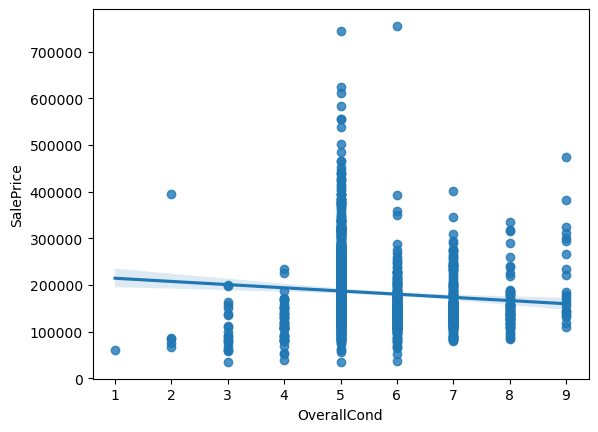

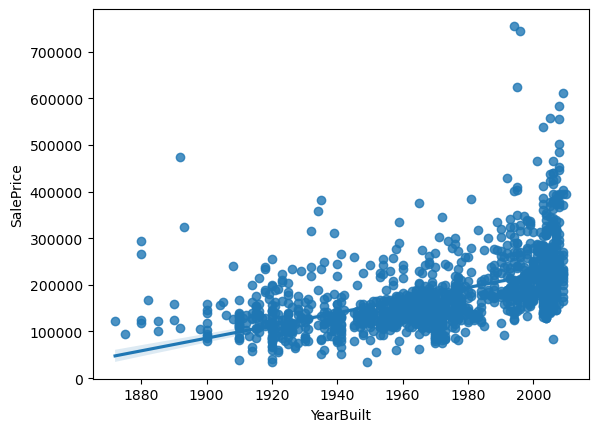

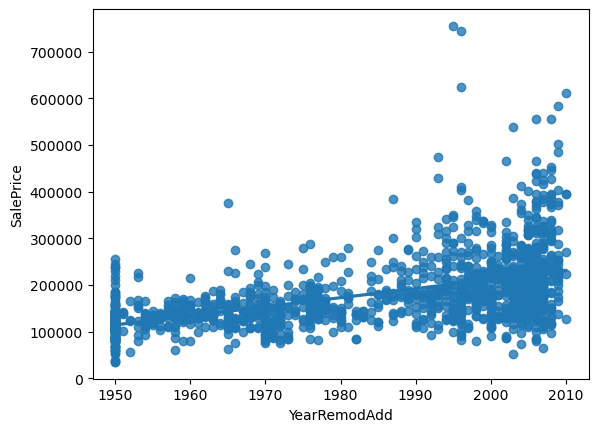

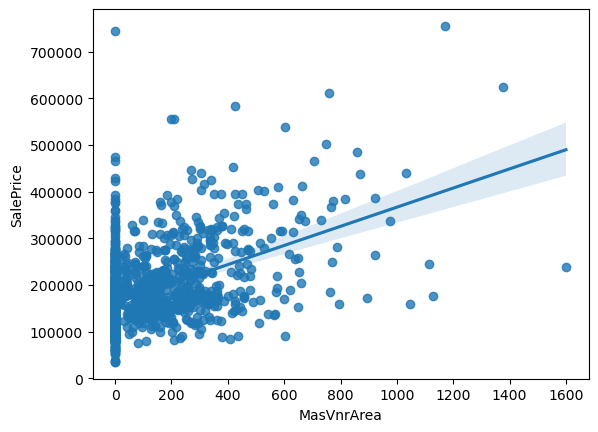

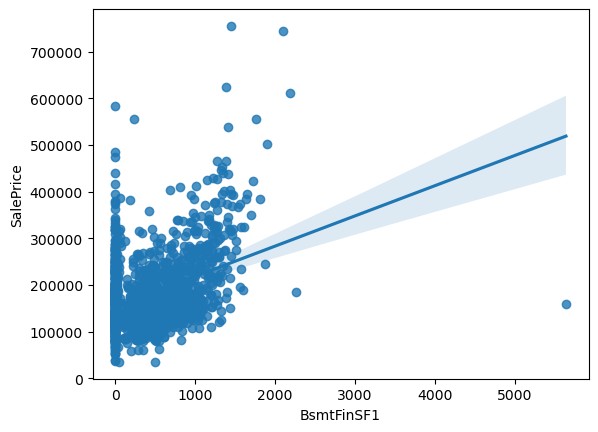

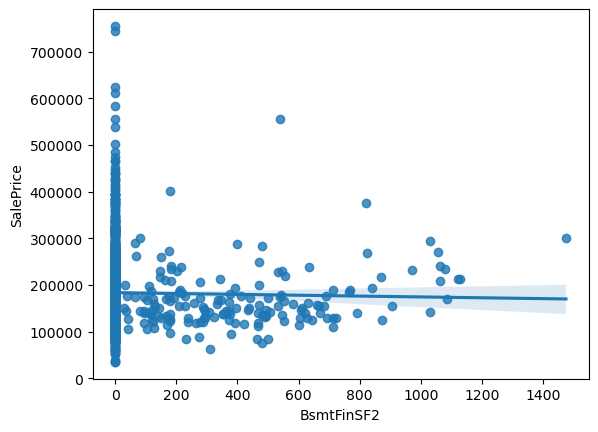

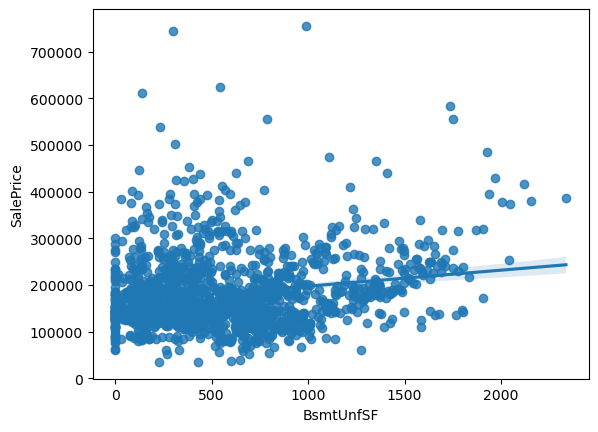

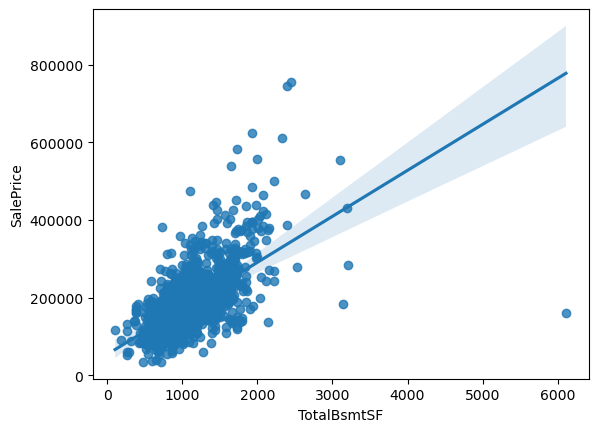

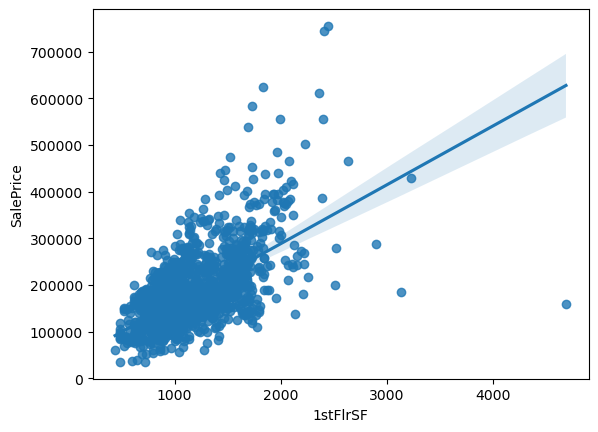

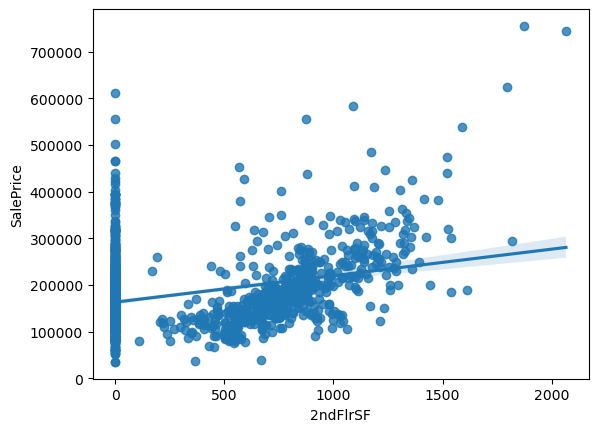

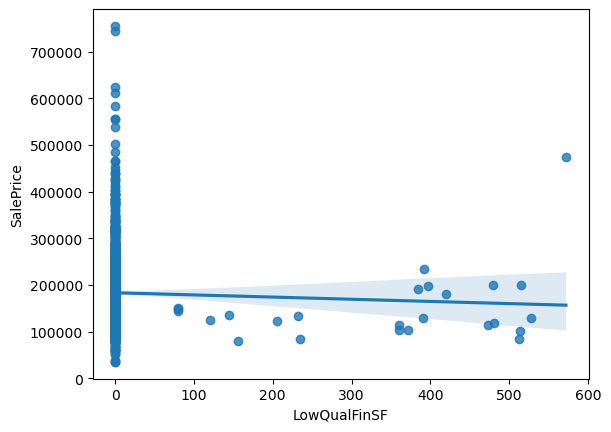

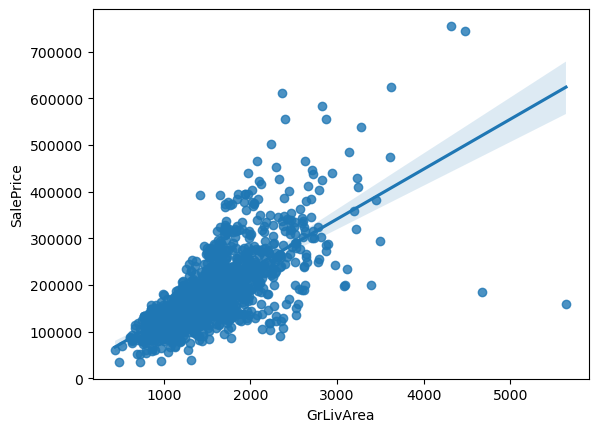

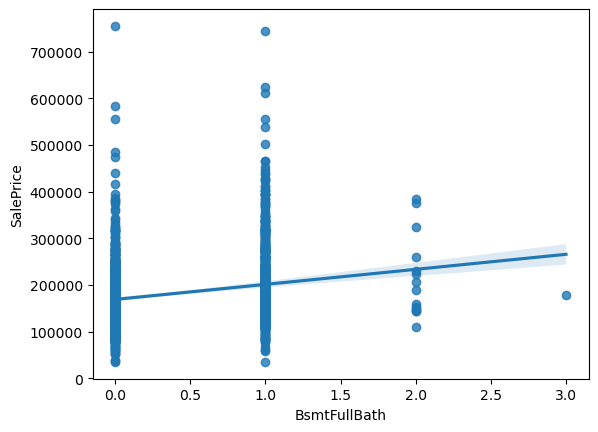

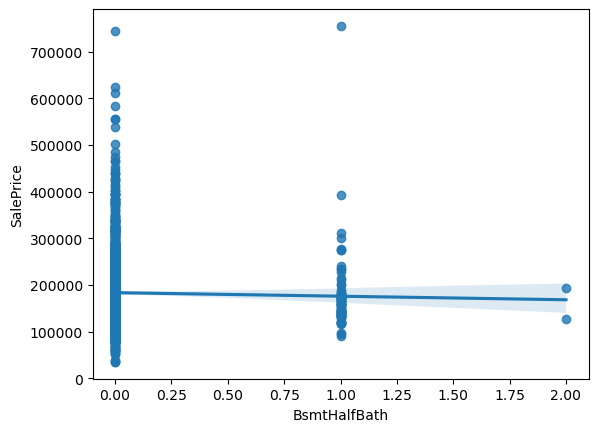

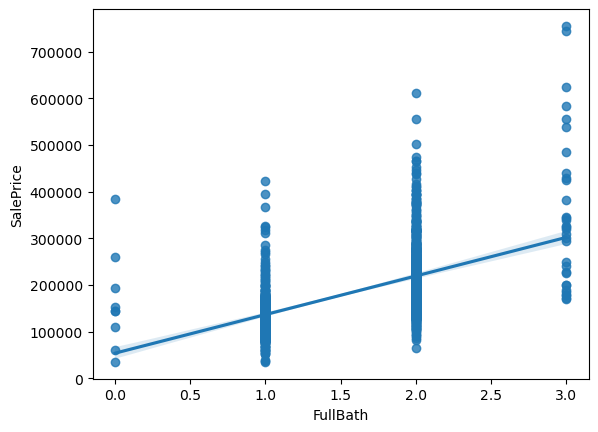

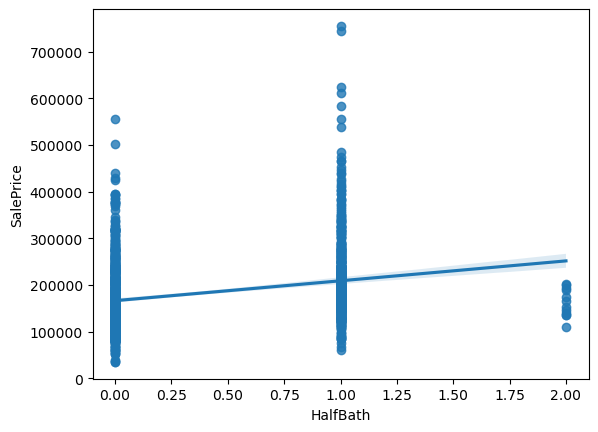

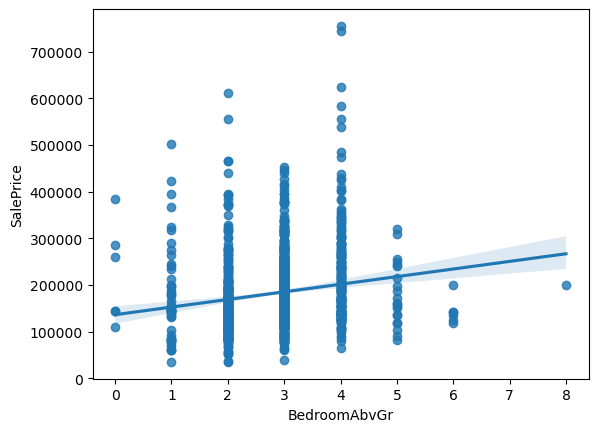

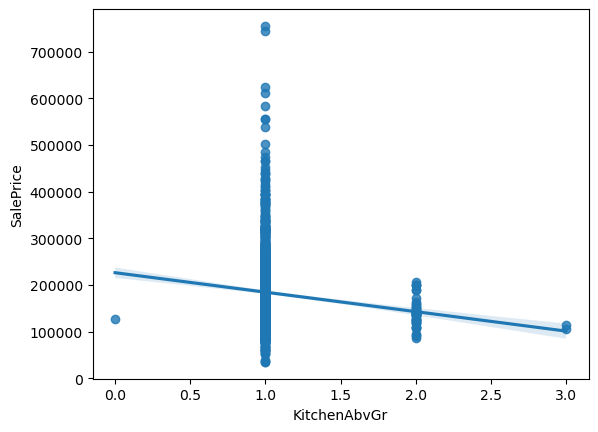

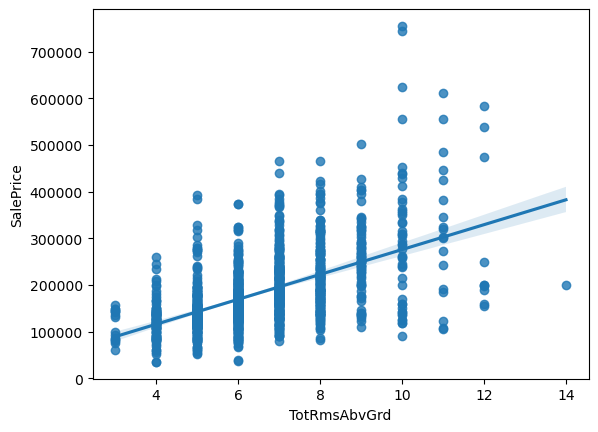

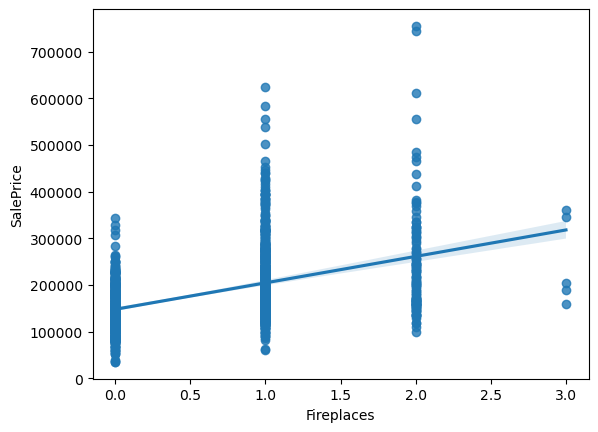

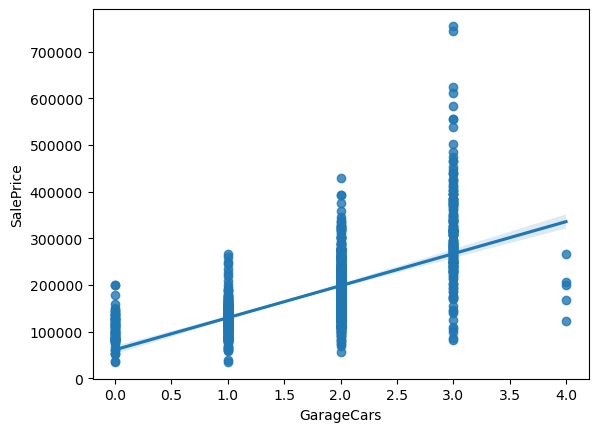

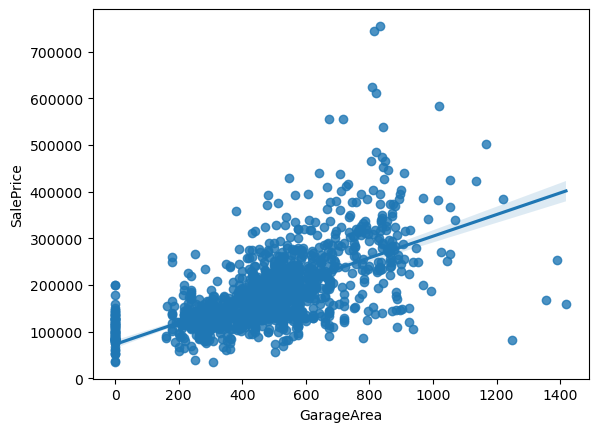

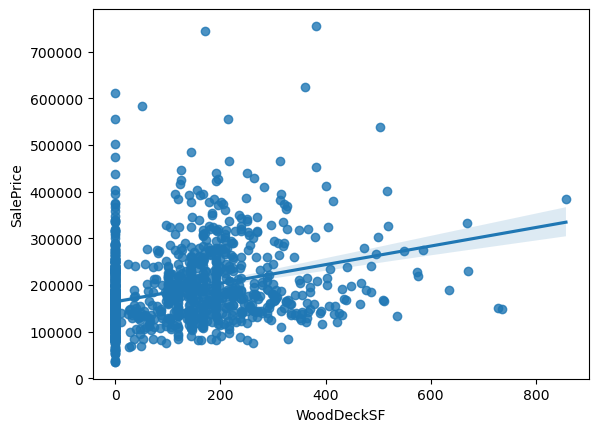

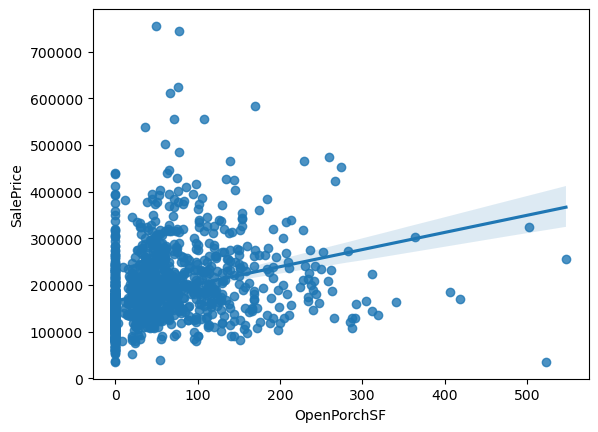

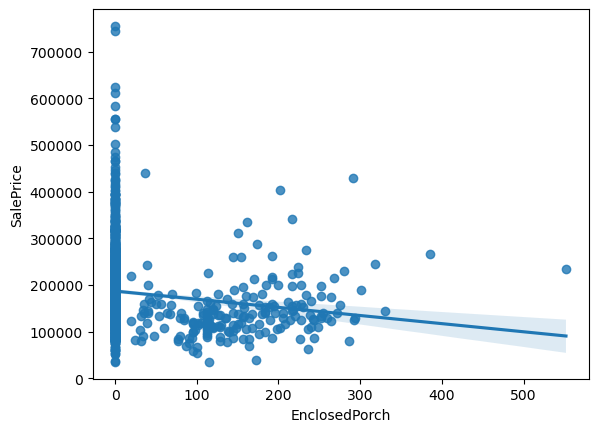

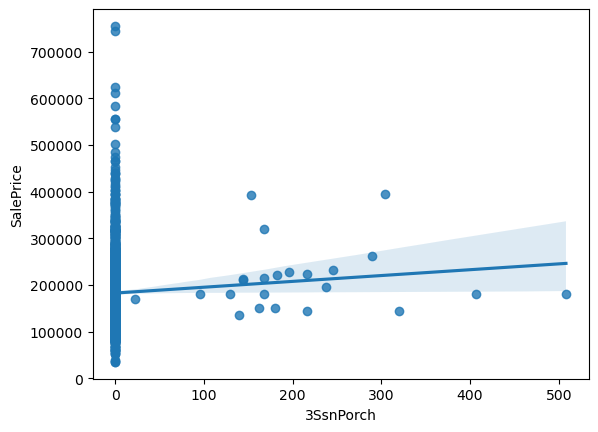

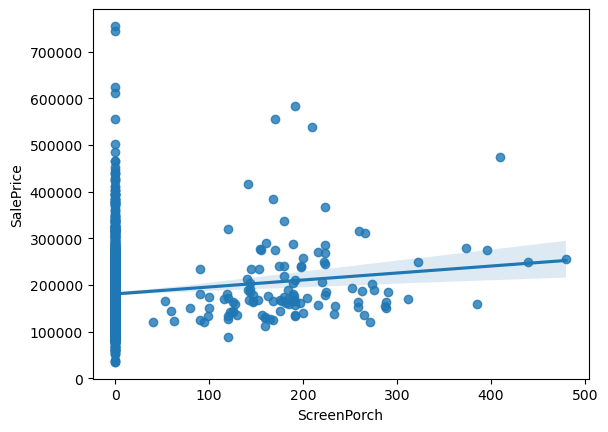

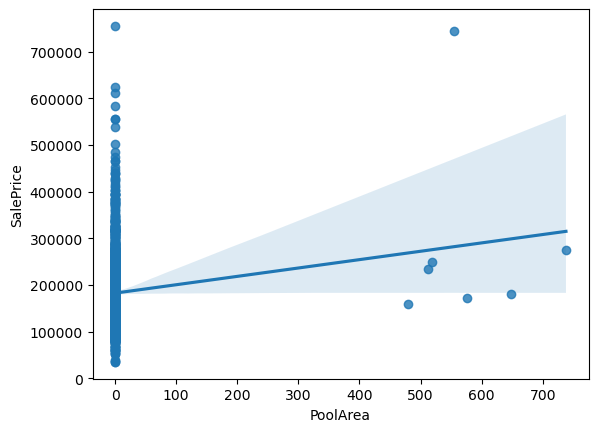

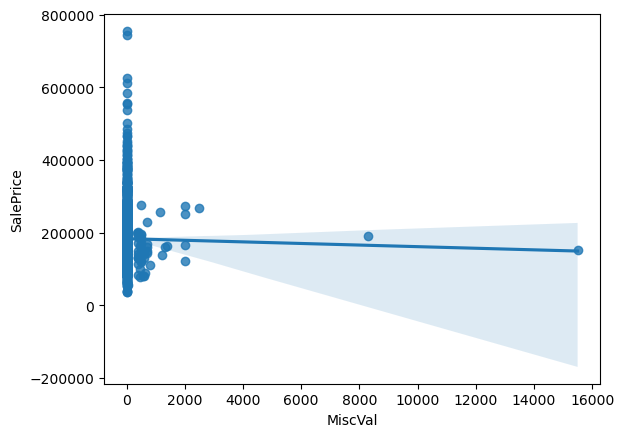

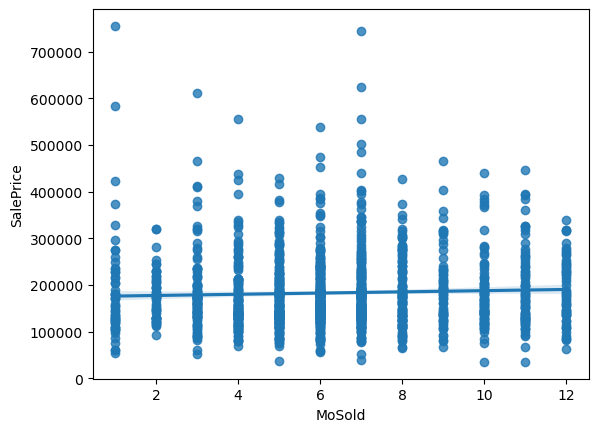

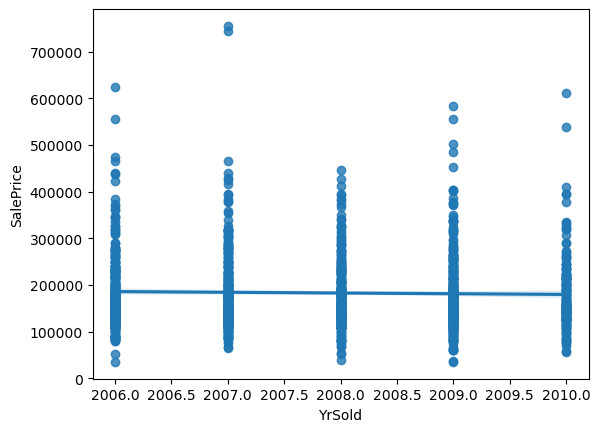

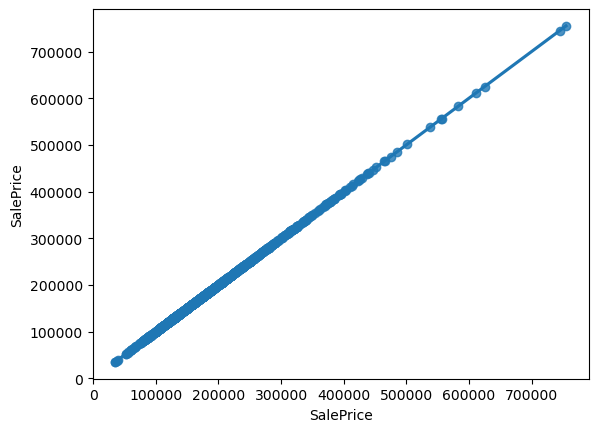

In [44]:
# Get a list of all the numerical variables in the DataFrame
num_vars = df.select_dtypes(include=['float', 'int']).columns

# Iterate over the list of numerical variables and create a scatter plot with a linear regression fit for each one
for var in num_vars:
    sns.regplot(x=var, y='SalePrice', data=df)
    plt.show()

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

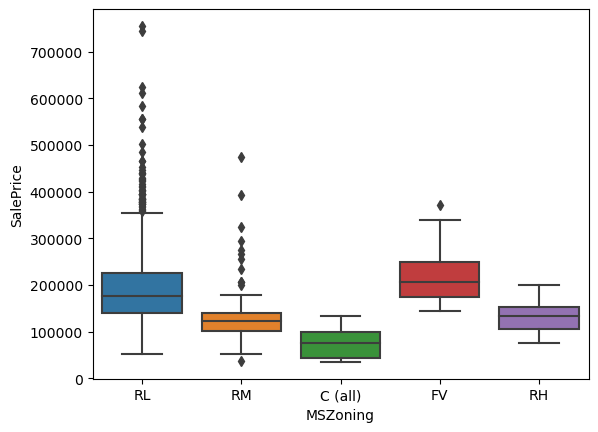

In [45]:
sns.boxplot(x="MSZoning", y="SalePrice", data=df)

<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

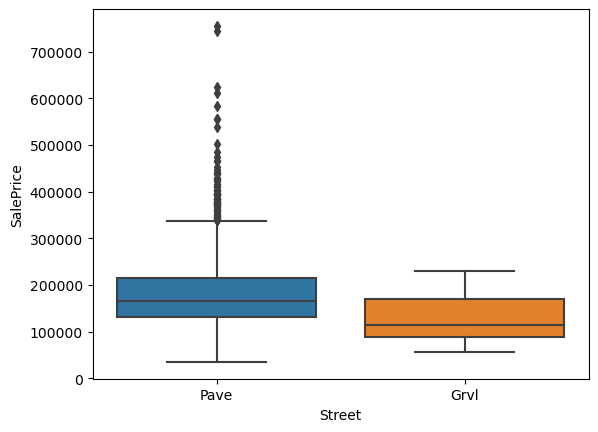

In [46]:
sns.boxplot(x="Street", y="SalePrice", data=df)

<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

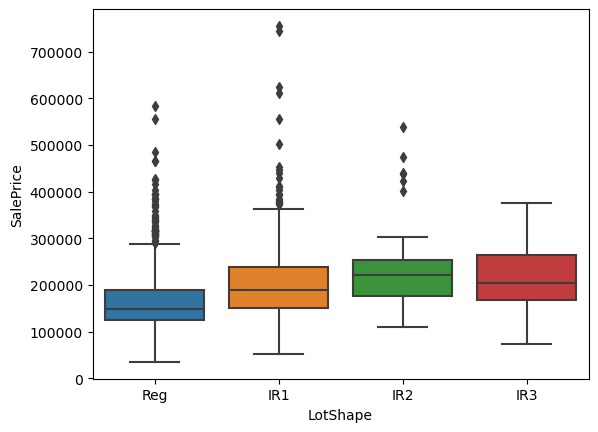

In [47]:
sns.boxplot(x="LotShape", y="SalePrice", data=df)

<AxesSubplot:xlabel='LandContour', ylabel='SalePrice'>

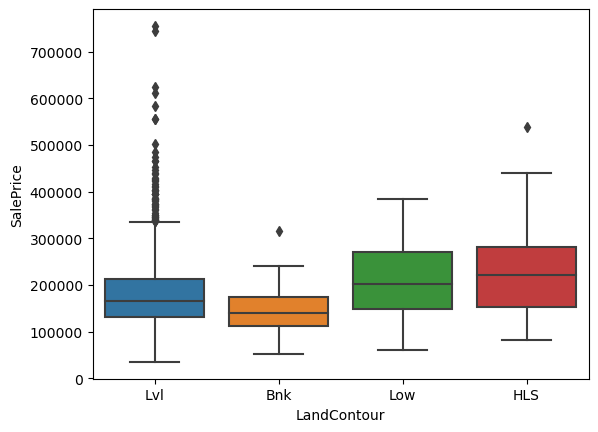

In [48]:
sns.boxplot(x="LandContour", y="SalePrice", data=df)

<AxesSubplot:xlabel='Utilities', ylabel='SalePrice'>

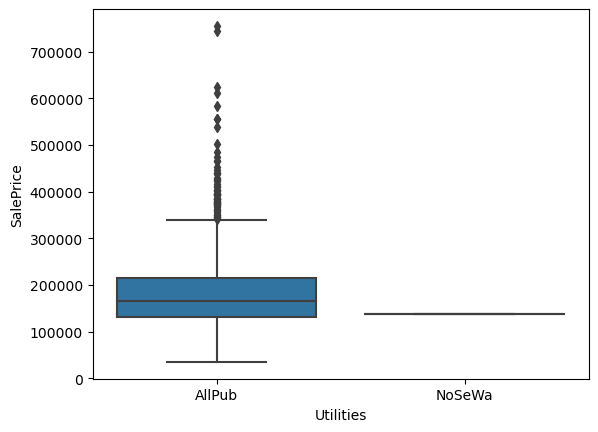

In [49]:
sns.boxplot(x="Utilities", y="SalePrice", data=df)

<AxesSubplot:xlabel='LotConfig', ylabel='SalePrice'>

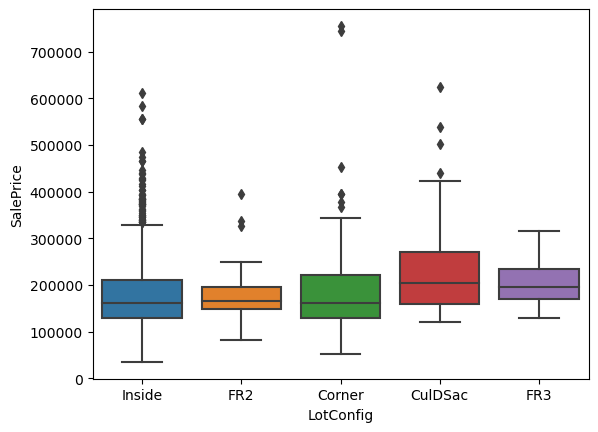

In [50]:
sns.boxplot(x="LotConfig", y="SalePrice", data=df)

<AxesSubplot:xlabel='LandSlope', ylabel='SalePrice'>

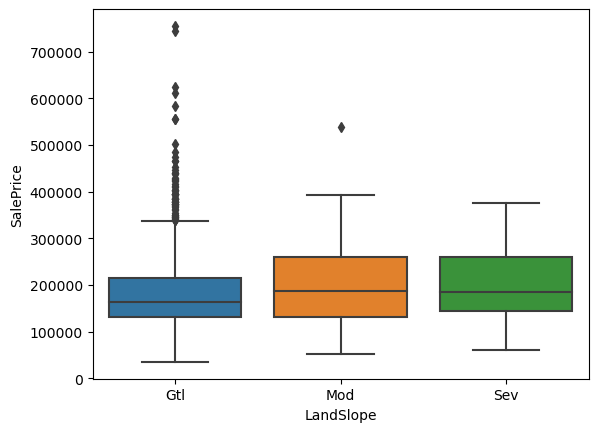

In [51]:
sns.boxplot(x="LandSlope", y="SalePrice", data=df)

In [52]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [53]:
df1=df[['LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope']]

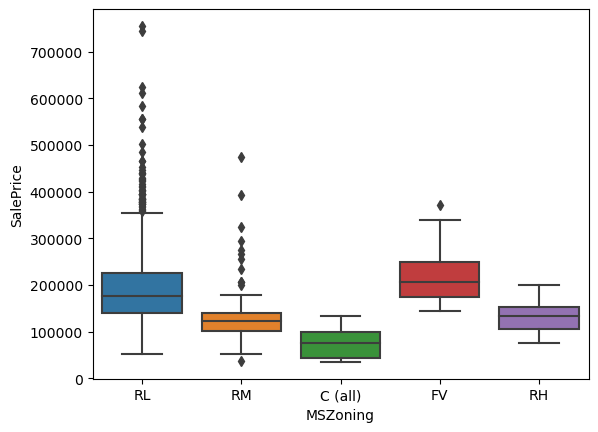

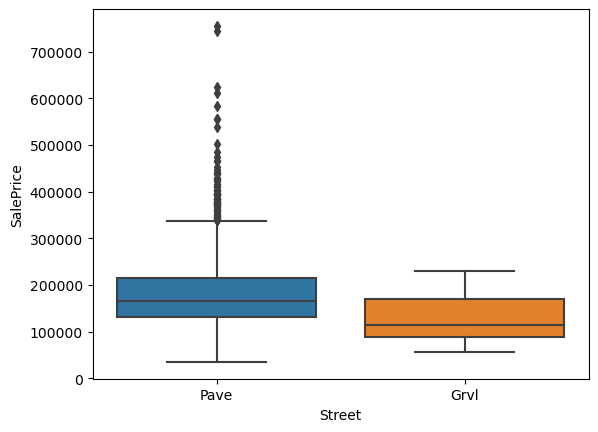

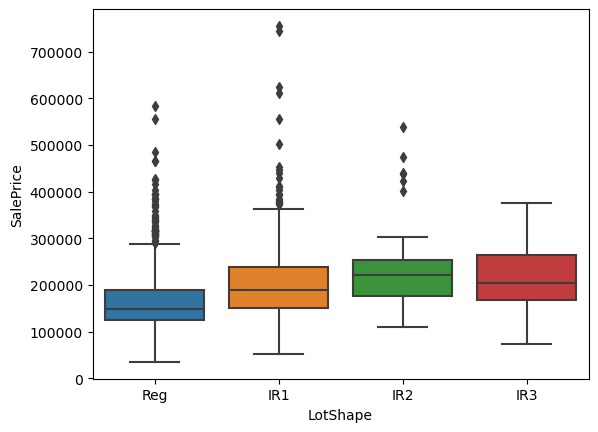

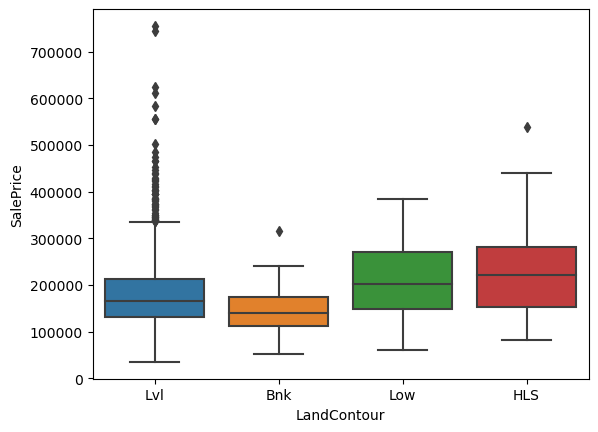

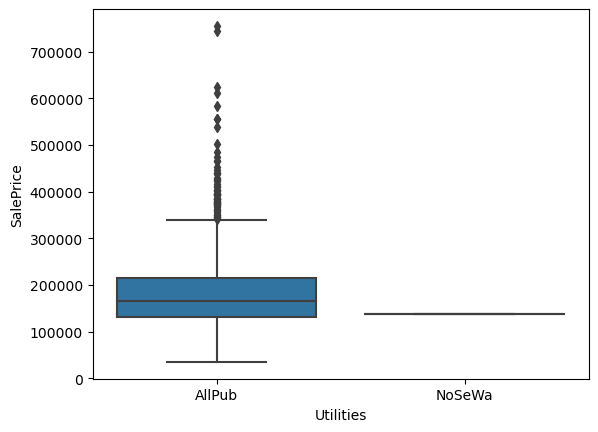

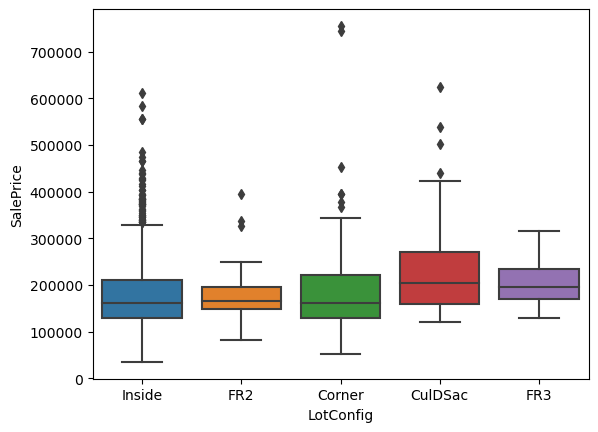

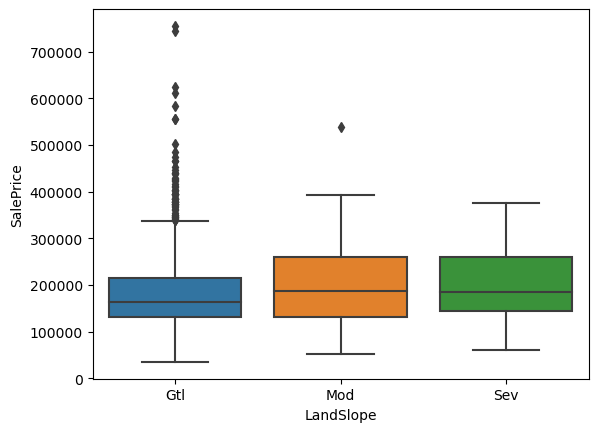

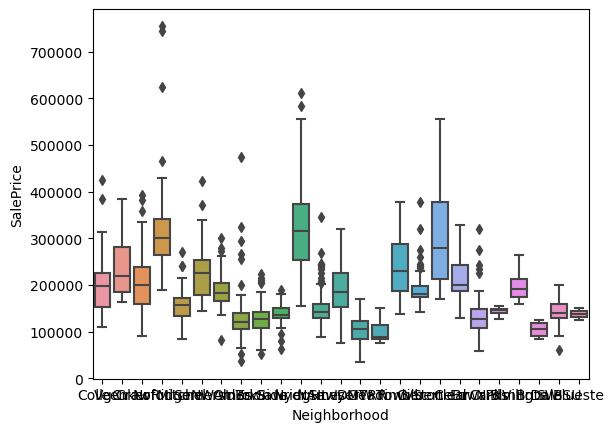

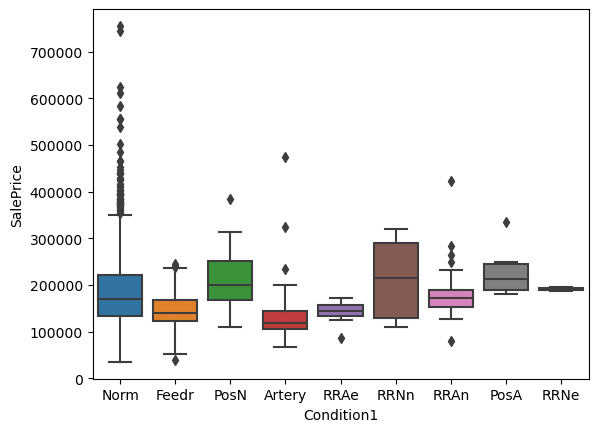

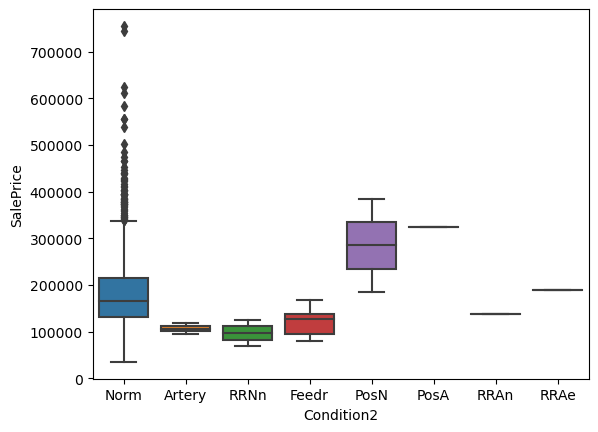

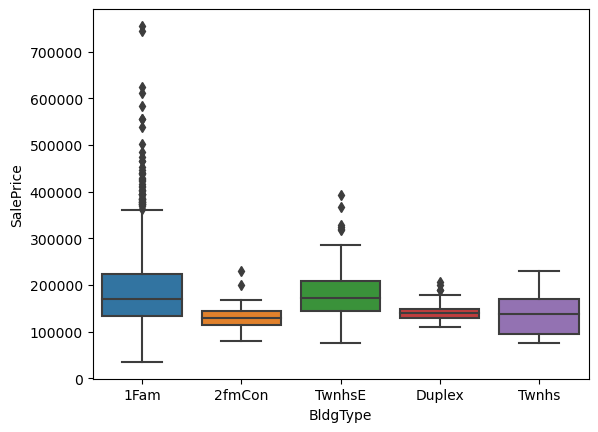

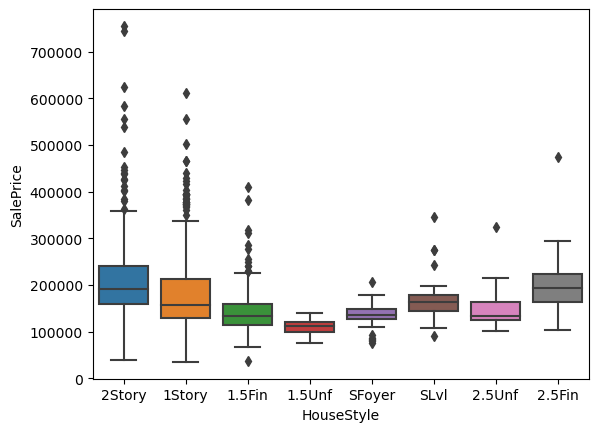

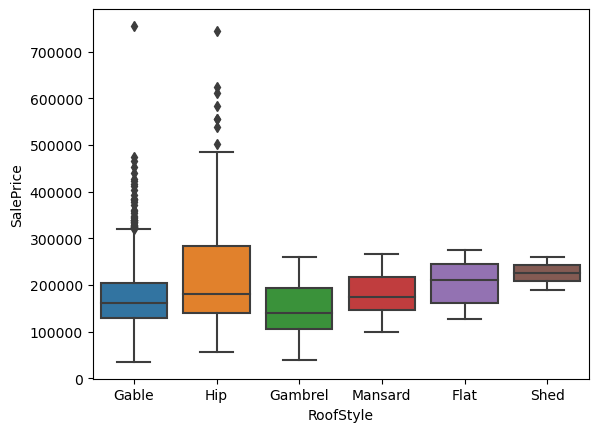

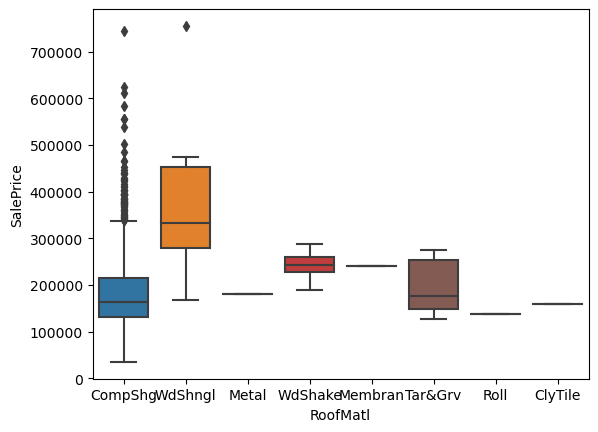

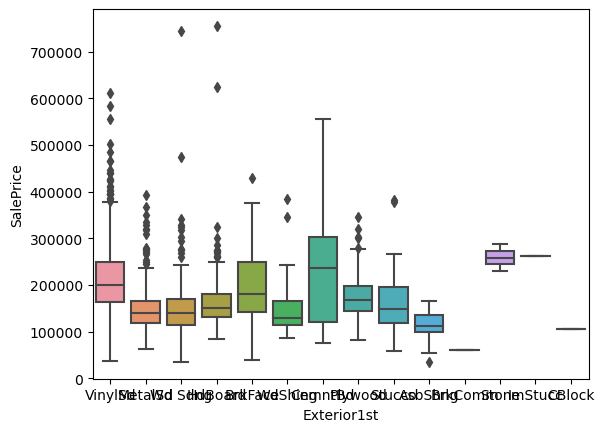

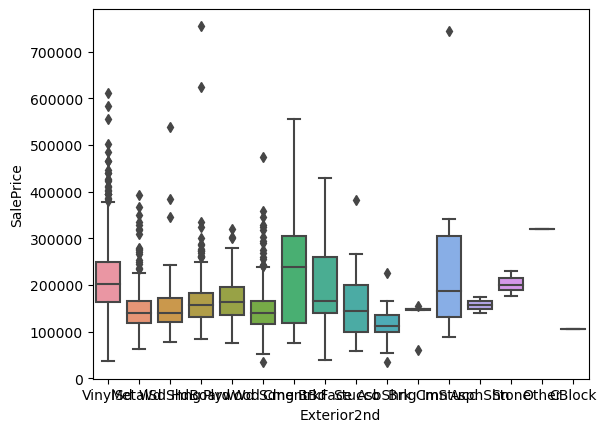

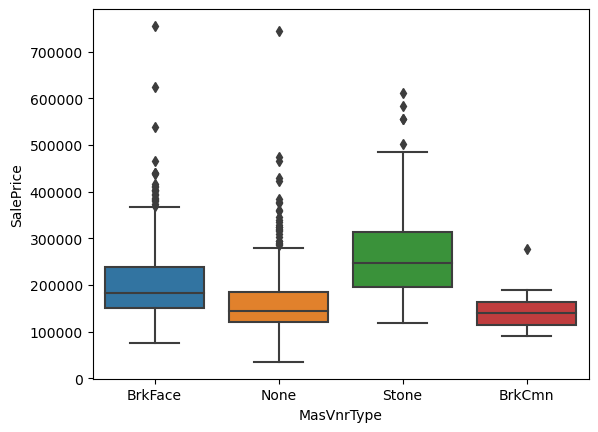

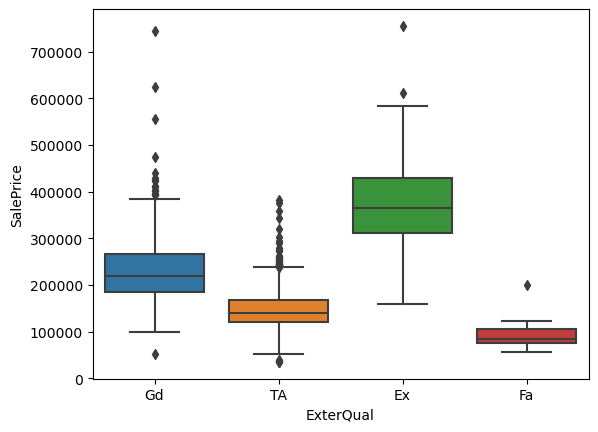

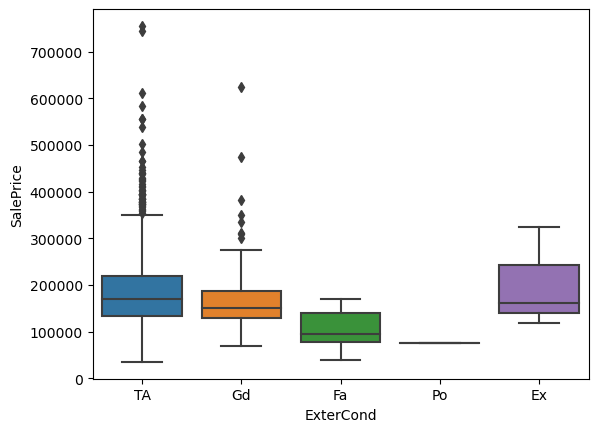

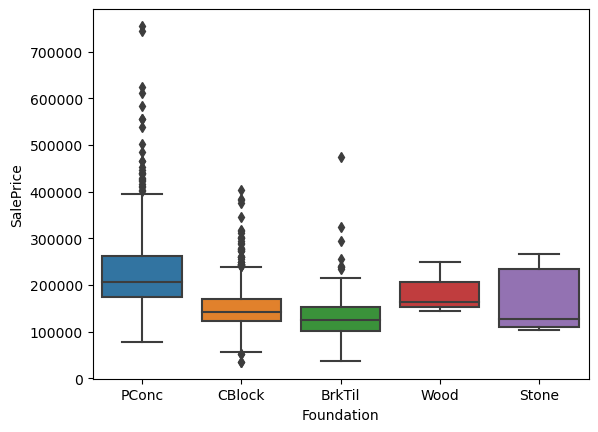

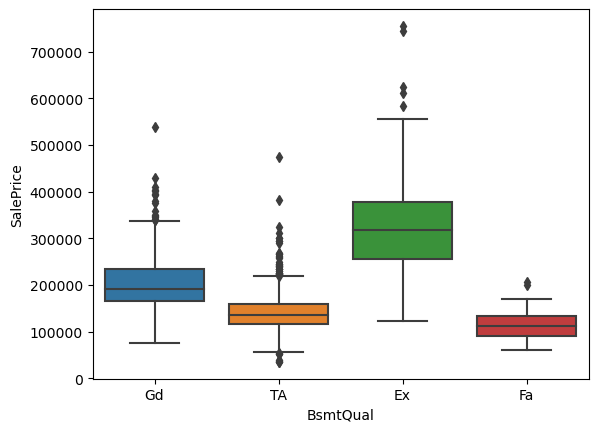

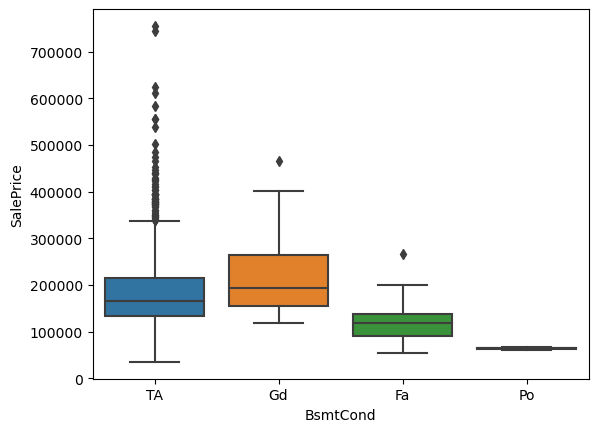

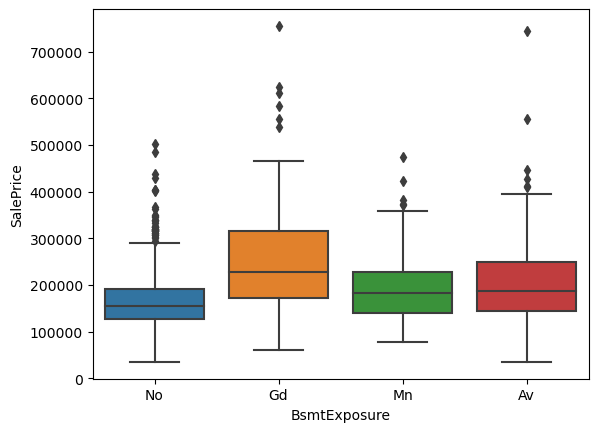

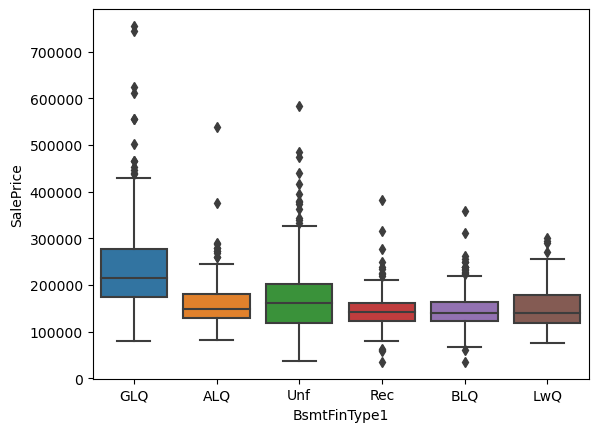

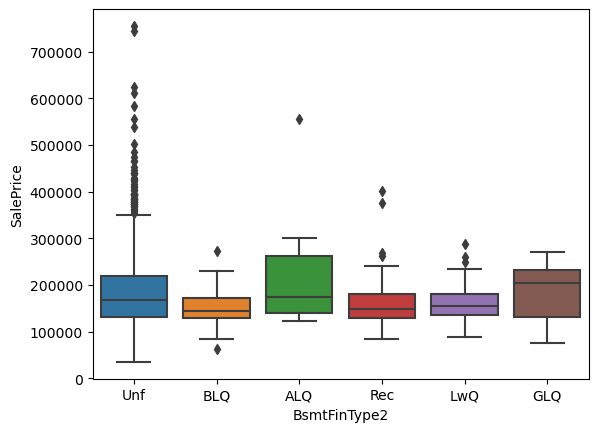

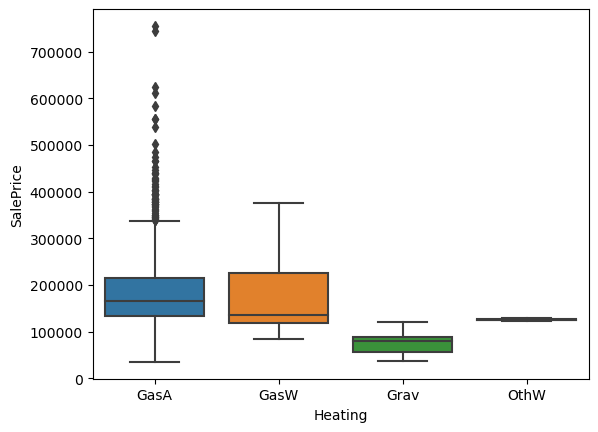

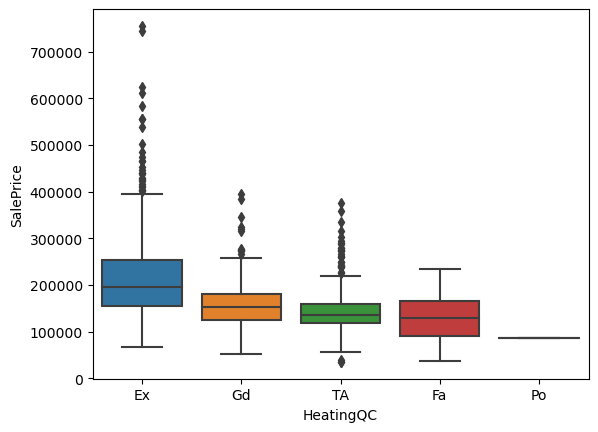

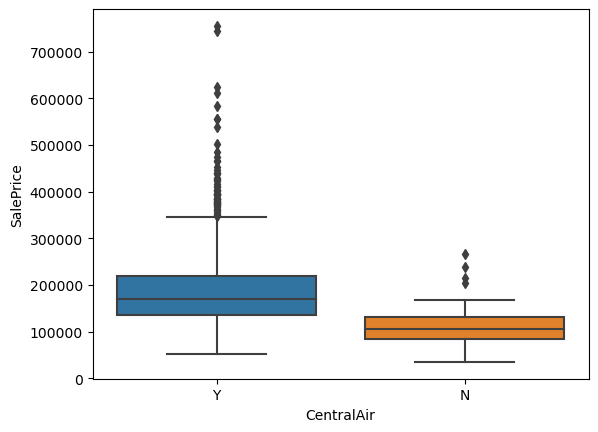

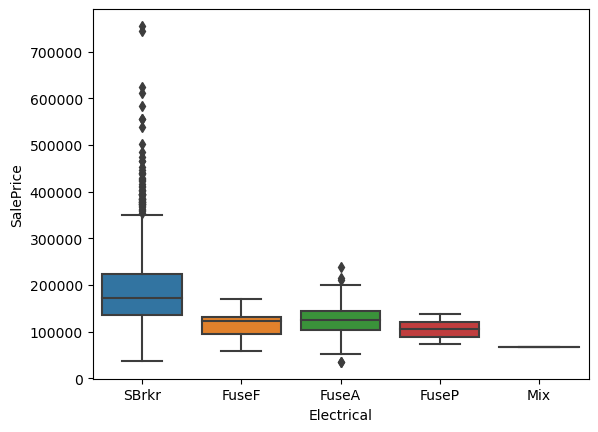

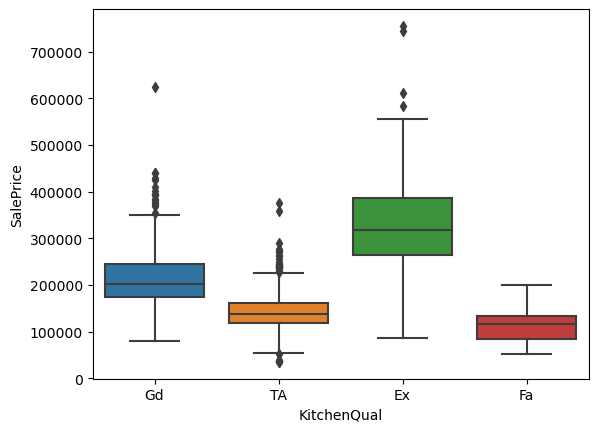

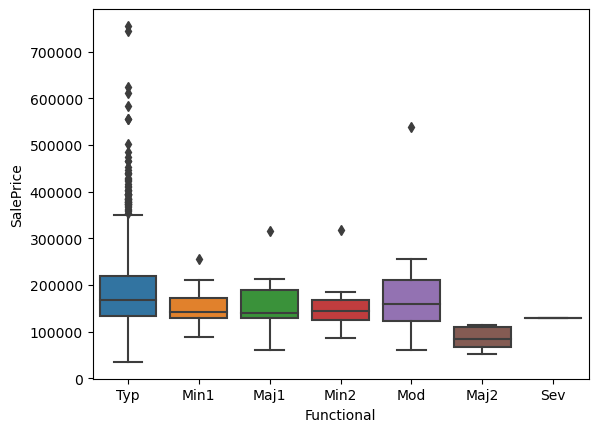

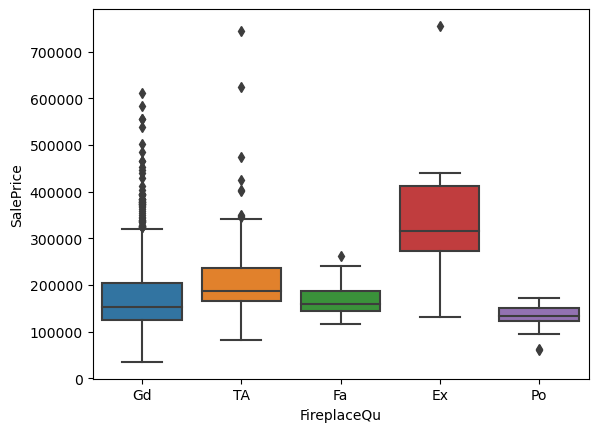

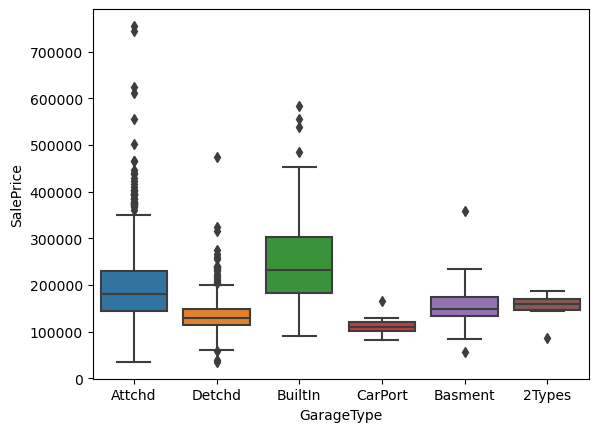

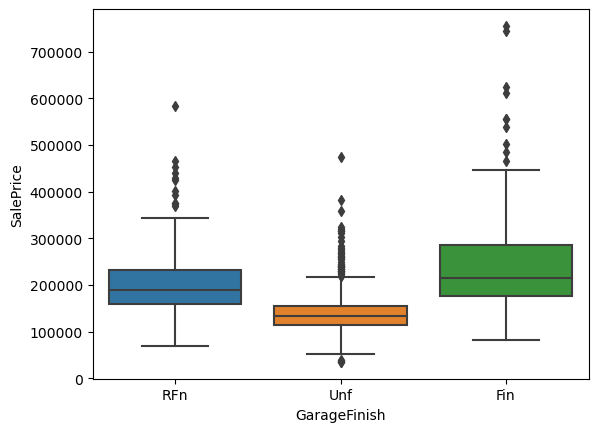

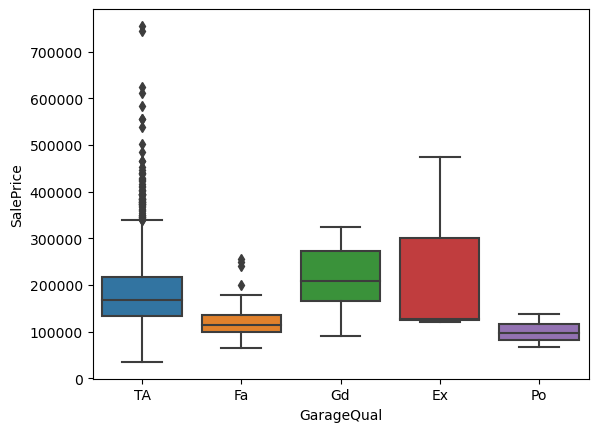

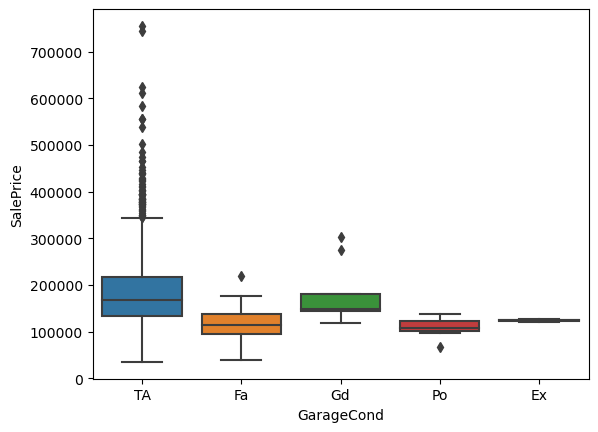

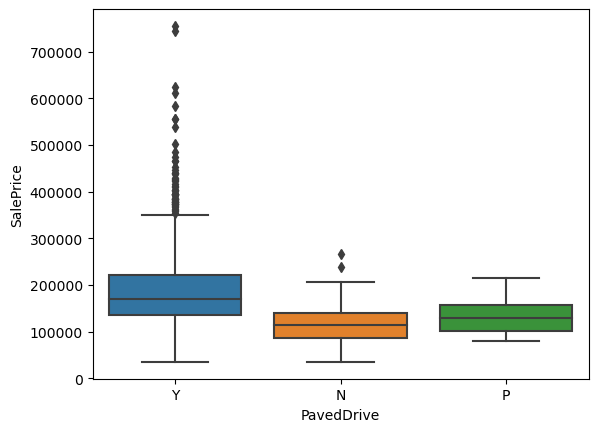

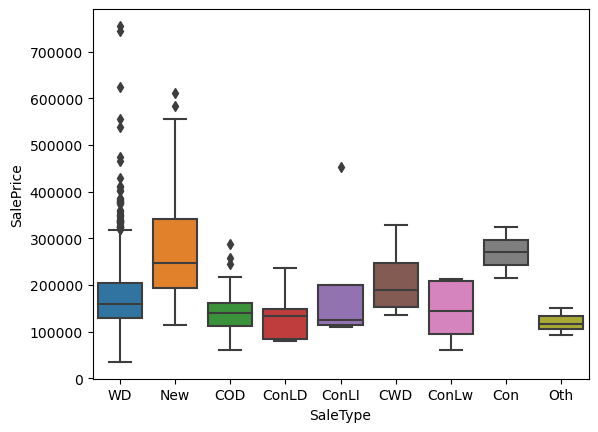

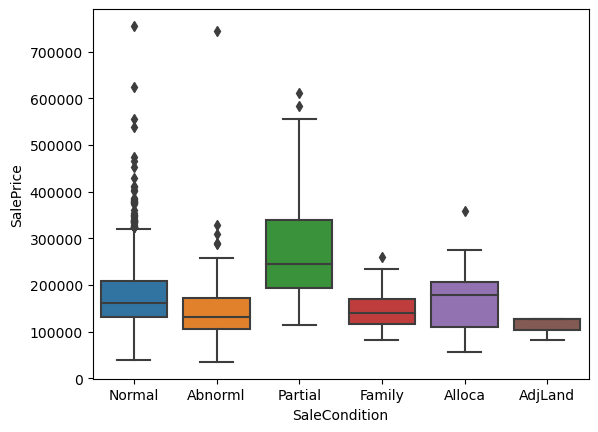

In [54]:
import seaborn as sns



# Get a list of all the categorical variables in the DataFrame
cat_vars = df.select_dtypes(include=['object']).columns

# Iterate over the list of categorical variables and create a box plot for each one
for var in cat_vars:
    sns.boxplot(x=var, y='SalePrice', data=df)
    plt.show()

In [55]:
def plot_categorical_variable(df, column_name):
  counts = df[column_name].value_counts()
  ax = counts.plot.bar()
  ax.set_xlabel(column_name)
  ax.set_ylabel('Count')
  ax.set_title(f'{column_name} counts')

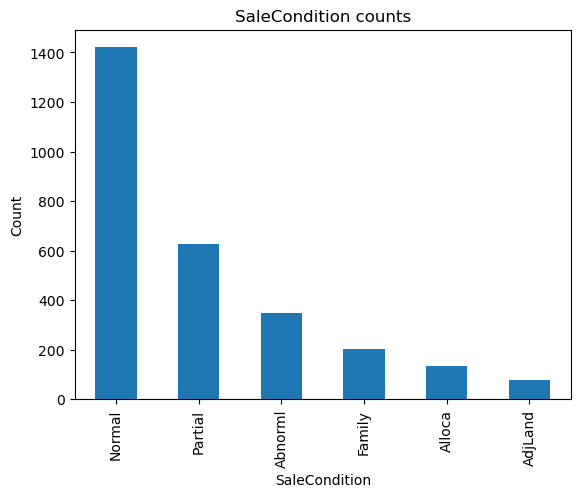

In [56]:
categorical_vars = df.select_dtypes(include=['object','category']).columns
for var in categorical_vars:
  plot_categorical_variable(df, var)

In [57]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 75, dtype: object

In [58]:
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1422.000000  1422.000000    1422.000000  1422.000000  1422.000000   
mean     56.775668    70.146723   10549.149789     6.146976     5.590717   
std      42.250147    22.260343   10097.991235     1.359483     1.109678   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7585.750000     5.000000     5.000000   
50%      50.000000    70.049958    9501.500000     6.000000     5.000000   
75%      70.000000    79.000000   11635.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1422.000000   1422.000000  1422.000000  1422.000000  1422.000000  ...   
mean   1971.625879   1985.306610   104.935302   455.495077    47.793249  ...   
std      30.379224     20.450801   181.942463   456.272479   163.279940  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1968.000000     0.000000     0.000000     0.000000  ...   
50%    1974.000000   1994.000000     0.000000   400.000000     0.000000  ...   
75%    2001.000000   2004.000000   168.000000   727.000000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1422.000000  1422.000000    1422.000000  1422.000000  1422.000000   
mean     96.068214    47.520394      22.004923     3.374121    15.463432   
std     126.144490    66.695549      61.184375    29.329871    56.442878   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    26.000000       0.000000     0.000000     0.000000   
75%     168.000000    69.750000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1422.000000   1422.000000  1422.000000  1422.000000    1422.000000  
mean      2.832630     40.994374     6.327004  2007.809423  182889.092124  
std      40.708401    493.124430     2.714278     1.326754   79414.407095  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  131625.000000  
50%       0.000000      0.000000     6.000000  2008.000000  165000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 36 columns]

In [59]:
df.describe(include=['object'])

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
count      1422   1422     1422        1422      1422      1422      1422   
unique        5      2        4           4         2         5         3   
top          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
freq       1118   1416      892        1277      1421      1023      1345   

       Neighborhood Condition1 Condition2  ... KitchenQual Functional  \
count          1422       1422       1422  ...        1422       1422   
unique           25          9          8  ...           4          7   
top           NAmes       Norm       Norm  ...          TA        Typ   
freq            215       1230       1407  ...         706       1331   

       FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
count         1422       1422         1422       1422       1422       1422   
unique           5          6            3          5          5          3   
top             Gd     Attchd          Unf         TA         TA          Y   
freq          1037        935          654       1354       1371       1313   

       SaleType SaleCondition  
count      1422          1422  
unique        9             6  
top          WD        Normal  
freq       1231          1165  

[4 rows x 39 columns]

In [60]:
df.shape

(1422, 75)

In [61]:
## Combine Test Data 

test_df=pd.read_csv('formulatedtest.csv')

In [62]:
test_df.shape

(1459, 74)

In [63]:
test_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          20       RH         80.0    11622   Pave      Reg         Lvl   
1          20       RL         81.0    14267   Pave      IR1         Lvl   
2          60       RL         74.0    13830   Pave      IR1         Lvl   
3          60       RL         78.0     9978   Pave      IR1         Lvl   
4         120       RL         43.0     5005   Pave      IR1         HLS   

  Utilities LotConfig LandSlope  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0    AllPub    Inside       Gtl  ...           0             0         0   
1    AllPub    Corner       Gtl  ...          36             0         0   
2    AllPub    Inside       Gtl  ...          34             0         0   
3    AllPub    Inside       Gtl  ...          36             0         0   
4    AllPub    Inside       Gtl  ...          82             0         0   

  ScreenPorch PoolArea  MiscVal  MoSold  YrSold  SaleType SaleCondition  
0         120        0        0       6    2010        WD        Normal  
1           0        0    12500       6    2010        WD        Normal  
2           0        0        0       3    2010        WD        Normal  
3           0        0        0       6    2010        WD        Normal  
4         144        0        0       1    2010        WD        Normal  

[5 rows x 74 columns]

In [64]:
test_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [65]:
final_df=pd.concat([df,test_df],axis=0)

In [66]:
final_df.shape

(2881, 75)

# HAndle Categorical Features

In [67]:
df1=final_df[['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']]

In [68]:
df1

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
1454       RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1455       RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave      Reg         Lvl    AllPub    Inside       Mod   

     Neighborhood Condition2 BldgType  ... CentralAir Electrical KitchenQual  \
0         CollgCr       Norm     1Fam  ...          Y      SBrkr          Gd   
1         Veenker       Norm     1Fam  ...          Y      SBrkr          TA   
2         CollgCr       Norm     1Fam  ...          Y      SBrkr          Gd   
3         Crawfor       Norm     1Fam  ...          Y      SBrkr          Gd   
4         NoRidge       Norm     1Fam  ...          Y      SBrkr          Gd   
...           ...        ...      ...  ...        ...        ...         ...   
1454      MeadowV       Norm    Twnhs  ...          Y      SBrkr          TA   
1455      MeadowV       Norm   TwnhsE  ...          Y      SBrkr          TA   
1456      Mitchel       Norm     1Fam  ...          Y      SBrkr          TA   
1457      Mitchel       Norm     1Fam  ...          Y      SBrkr          TA   
1458      Mitchel       Norm     1Fam  ...          Y      SBrkr          TA   

     Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
0           Typ          Gd     Attchd          RFn         TA         TA   
1           Typ          TA     Attchd          RFn         TA         TA   
2           Typ          TA     Attchd          RFn         TA         TA   
3           Typ          Gd     Detchd          Unf         TA         TA   
4           Typ          TA     Attchd          RFn         TA         TA   
...         ...         ...        ...          ...        ...        ...   
1454        Typ          Gd     Attchd          Unf         TA         TA   
1455        Typ          Gd    CarPort          Unf         TA         TA   
1456        Typ          TA     Detchd          Unf         TA         TA   
1457        Typ          Gd     Attchd          Unf         TA         TA   
1458        Typ          TA     Attchd          Fin         TA         TA   

     PavedDrive  
0             Y  
1             Y  
2             Y  
3             Y  
4             Y  
...         ...  
1454          Y  
1455          Y  
1456          Y  
1457          Y  
1458          Y  

[2881 rows x 39 columns]

In [69]:
from sklearn.preprocessing import LabelEncoder

#create instance of label encoder
df1=df1.apply(LabelEncoder().fit_transform)

df1

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  \
0            3       1         3            3          0          4   
1            3       1         3            3          0          2   
2            3       1         0            3          0          4   
3            3       1         0            3          0          0   
4            3       1         0            3          0          2   
...        ...     ...       ...          ...        ...        ...   
1454         4       1         3            3          0          4   
1455         4       1         3            3          0          4   
1456         3       1         3            3          0          4   
1457         3       1         3            3          0          4   
1458         3       1         3            3          0          4   

      LandSlope  Neighborhood  Condition2  BldgType  ...  CentralAir  \
0             0             5           2         0  ...           1   
1             0            24           2         0  ...           1   
2             0             5           2         0  ...           1   
3             0             6           2         0  ...           1   
4             0            15           2         0  ...           1   
...         ...           ...         ...       ...  ...         ...   
1454          0            10           2         3  ...           1   
1455          0            10           2         4  ...           1   
1456          0            11           2         0  ...           1   
1457          0            11           2         0  ...           1   
1458          1            11           2         0  ...           1   

      Electrical  KitchenQual  Functional  FireplaceQu  GarageType  \
0              4            2           6            2           1   
1              4            3           6            4           1   
2              4            2           6            4           1   
3              4            2           6            2           5   
4              4            2           6            4           1   
...          ...          ...         ...          ...         ...   
1454           4            3           6            2           1   
1455           4            3           6            2           4   
1456           4            3           6            4           5   
1457           4            3           6            2           1   
1458           4            3           6            4           1   

      GarageFinish  GarageQual  GarageCond  PavedDrive  
0                1           4           4           2  
1                1           4           4           2  
2                1           4           4           2  
3                2           4           4           2  
4                1           4           4           2  
...            ...         ...         ...         ...  
1454             2           4           4           2  
1455             2           4           4           2  
1456             2           4           4           2  
1457             2           4           4           2  
1458             0           4           4           2  

[2881 rows x 39 columns]

In [70]:
final_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0       0       2    2008        WD         Normal  208500.0  
1        0       0       5    2007        WD         Normal  181500.0  
2        0       0       9    2008        WD         Normal  223500.0  
3        0       0       2    2006        WD        Abnorml  140000.0  
4        0       0      12    2008        WD         Normal  250000.0  

[5 rows x 75 columns]

In [71]:
final_df.drop(['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive'],axis="columns",inplace=True)

In [72]:
final_df

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1454         160         21.0     1936            4            7       1970   
1455         160         21.0     1894            4            5       1970   
1456          20        160.0    20000            5            7       1960   
1457          85         62.0    10441            5            5       1992   
1458          60         74.0     9627            7            5       1993   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0             2003       196.0       706.0         0.0  ...           0   
1             1976         0.0       978.0         0.0  ...         298   
2             2002       162.0       486.0         0.0  ...           0   
3             1970         0.0       216.0         0.0  ...           0   
4             2000       350.0       655.0         0.0  ...         192   
...            ...         ...         ...         ...  ...         ...   
1454          1970         0.0         0.0         0.0  ...           0   
1455          1970         0.0       252.0         0.0  ...           0   
1456          1996         0.0      1224.0         0.0  ...         474   
1457          1992         0.0       337.0         0.0  ...          80   
1458          1994        94.0       758.0         0.0  ...         190   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272          0            0         0        0   
4              84              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
1454            0              0          0            0         0        0   
1455           24              0          0            0         0        0   
1456            0              0          0            0         0        0   
1457           32              0          0            0         0      700   
1458           48              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
0          2    2008   208500.0  
1          5    2007   181500.0  
2          9    2008   223500.0  
3          2    2006   140000.0  
4         12    2008   250000.0  
...      ...     ...        ...  
1454       6    2006        NaN  
1455       4    2006        NaN  
1456       9    2006        NaN  
1457       7    2006        NaN  
1458      11    2006        NaN  

[2881 rows x 36 columns]

In [73]:
final_df.shape

(2881, 36)

In [74]:
final_data=pd.concat([final_df,df1],axis=1)

In [75]:
final_data

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1454         160         21.0     1936            4            7       1970   
1455         160         21.0     1894            4            5       1970   
1456          20        160.0    20000            5            7       1960   
1457          85         62.0    10441            5            5       1992   
1458          60         74.0     9627            7            5       1993   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  CentralAir  \
0             2003       196.0       706.0         0.0  ...           1   
1             1976         0.0       978.0         0.0  ...           1   
2             2002       162.0       486.0         0.0  ...           1   
3             1970         0.0       216.0         0.0  ...           1   
4             2000       350.0       655.0         0.0  ...           1   
...            ...         ...         ...         ...  ...         ...   
1454          1970         0.0         0.0         0.0  ...           1   
1455          1970         0.0       252.0         0.0  ...           1   
1456          1996         0.0      1224.0         0.0  ...           1   
1457          1992         0.0       337.0         0.0  ...           1   
1458          1994        94.0       758.0         0.0  ...           1   

      Electrical  KitchenQual  Functional  FireplaceQu  GarageType  \
0              4            2           6            2           1   
1              4            3           6            4           1   
2              4            2           6            4           1   
3              4            2           6            2           5   
4              4            2           6            4           1   
...          ...          ...         ...          ...         ...   
1454           4            3           6            2           1   
1455           4            3           6            2           4   
1456           4            3           6            4           5   
1457           4            3           6            2           1   
1458           4            3           6            4           1   

      GarageFinish  GarageQual  GarageCond  PavedDrive  
0                1           4           4           2  
1                1           4           4           2  
2                1           4           4           2  
3                2           4           4           2  
4                1           4           4           2  
...            ...         ...         ...         ...  
1454             2           4           4           2  
1455             2           4           4           2  
1456             2           4           4           2  
1457             2           4           4           2  
1458             0           4           4           2  

[2881 rows x 75 columns]

In [76]:
df_Train=final_data.iloc[:1422,:]
df_Test=final_data.iloc[1422:,:]

In [77]:
df_Train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  CentralAir  \
0          2003       196.0       706.0         0.0  ...           1   
1          1976         0.0       978.0         0.0  ...           1   
2          2002       162.0       486.0         0.0  ...           1   
3          1970         0.0       216.0         0.0  ...           1   
4          2000       350.0       655.0         0.0  ...           1   

   Electrical  KitchenQual  Functional  FireplaceQu  GarageType  GarageFinish  \
0           4            2           6            2           1             1   
1           4            3           6            4           1             1   
2           4            2           6            4           1             1   
3           4            2           6            2           5             2   
4           4            2           6            4           1             1   

   GarageQual  GarageCond  PavedDrive  
0           4           4           2  
1           4           4           2  
2           4           4           2  
3           4           4           2  
4           4           4           2  

[5 rows x 75 columns]

In [78]:
df_Test.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          20         80.0    11622            5            6       1961   
1          20         81.0    14267            6            6       1958   
2          60         74.0    13830            5            5       1997   
3          60         78.0     9978            6            6       1998   
4         120         43.0     5005            8            5       1992   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  CentralAir  \
0          1961         0.0       468.0       144.0  ...           1   
1          1958       108.0       923.0         0.0  ...           1   
2          1998         0.0       791.0         0.0  ...           1   
3          1998        20.0       602.0         0.0  ...           1   
4          1992         0.0       263.0         0.0  ...           1   

   Electrical  KitchenQual  Functional  FireplaceQu  GarageType  GarageFinish  \
0           4            3           6            2           1             2   
1           4            2           6            2           1             2   
2           4            3           6            4           1             0   
3           4            2           6            2           1             0   
4           4            2           6            2           1             1   

   GarageQual  GarageCond  PavedDrive  
0           4           4           2  
1           4           4           2  
2           4           4           2  
3           4           4           2  
4           4           4           2  

[5 rows x 75 columns]

In [79]:
df_Train.shape

(1422, 75)

In [80]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8316\3985304647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Test.drop(['SalePrice'],axis=1,inplace=True)


In [81]:
x=df_Train.drop(['SalePrice'],axis=1)
y=df_Train['SalePrice']

# Prediciton and selecting the Algorithm

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=47,test_size=0.2)

In [83]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [84]:
reg.fit(x_train,y_train)

LinearRegression()

In [85]:
y_pred=reg.predict(x_test)
y_pred

array([194088.07150484,  89415.27699677, 144748.46090289, 190795.72773206,
        80737.380268  , 307091.49807625, 104297.98837571, 193514.24771937,
       131001.17919266, 175646.74253545, 232178.95494744, 147961.08889536,
        90460.70758635, 948552.88608979, 103426.4432506 , 152043.46154708,
       189456.39250684, 152656.72530181, 131569.07903055, 223200.31749622,
       205090.56222732, 248145.37673996, 122885.216079  , 225870.27727422,
       467155.29154014, 248017.06016167, 154048.99691317, 142080.36769288,
       125466.7461174 ,  97743.23339147, 213672.90252191, 238575.85617511,
       166807.00641072, 128333.04552039, 421642.11474122, 335962.19612829,
       172436.55265189, 153993.19754908, 151480.27625635, 202756.42216477,
       554691.43852229,  93730.47446627, 184329.00757534, 154285.28851463,
       249345.64055713,  62542.93853044, 247521.47230877, 128033.59464795,
       153517.76011356, 180491.77232693, 239574.36004588, 199585.96116613,
       168973.60872943, 3

In [86]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0       0       2    2008        WD         Normal    208500  
1        0       0       5    2007        WD         Normal    181500  
2        0       0       9    2008        WD         Normal    223500  
3        0       0       2    2006        WD        Abnorml    140000  
4        0       0      12    2008        WD         Normal    250000  

[5 rows x 75 columns]

In [87]:
df2=df[['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']]

In [88]:
from sklearn.preprocessing import LabelEncoder

#create instance of label encoder
df2=df2.apply(LabelEncoder().fit_transform)

df2

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  \
0            3       1         3            3          0          4   
1            3       1         3            3          0          2   
2            3       1         0            3          0          4   
3            3       1         0            3          0          0   
4            3       1         0            3          0          2   
...        ...     ...       ...          ...        ...        ...   
1455         3       1         3            3          0          4   
1456         3       1         3            3          0          4   
1457         3       1         3            3          0          4   
1458         3       1         3            3          0          4   
1459         3       1         3            3          0          4   

      LandSlope  Neighborhood  Condition2  BldgType  ...  CentralAir  \
0             0             5           2         0  ...           1   
1             0            24           2         0  ...           1   
2             0             5           2         0  ...           1   
3             0             6           2         0  ...           1   
4             0            15           2         0  ...           1   
...         ...           ...         ...       ...  ...         ...   
1455          0             8           2         0  ...           1   
1456          0            14           2         0  ...           1   
1457          0             6           2         0  ...           1   
1458          0            12           2         0  ...           1   
1459          0             7           2         0  ...           1   

      Electrical  KitchenQual  Functional  FireplaceQu  GarageType  \
0              4            2           6            2           1   
1              4            3           6            4           1   
2              4            2           6            4           1   
3              4            2           6            2           5   
4              4            2           6            4           1   
...          ...          ...         ...          ...         ...   
1455           4            3           6            4           1   
1456           4            3           2            4           1   
1457           4            2           6            2           1   
1458           0            2           6            2           1   
1459           4            3           6            2           1   

      GarageFinish  GarageQual  GarageCond  PavedDrive  
0                1           4           4           2  
1                1           4           4           2  
2                1           4           4           2  
3                2           4           4           2  
4                1           4           4           2  
...            ...         ...         ...         ...  
1455             1           4           4           2  
1456             2           4           4           2  
1457             1           4           4           2  
1458             2           4           4           2  
1459             0           4           4           2  

[1422 rows x 39 columns]

In [89]:
df.drop(['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive'],axis="columns",inplace=True)

In [90]:
final_data=pd.concat([df,df2],axis=1)

In [91]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [92]:

lr_model=LinearRegression()
ridge_model=Ridge()
lasso_model=Lasso()
knn_model=KNeighborsRegressor()
dt_model=DecisionTreeRegressor()
rf_model=RandomForestRegressor()
gb_model=GradientBoostingRegressor()
ada_bost_model=AdaBoostRegressor()
ext_reg_model=ExtraTreesRegressor()
sv_model=SVR()
xgb_model=XGBRegressor()

In [93]:
final_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'MSZoning', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition2', 'BldgType', 'Condition1', 'HouseStyle', 'SaleType',
       'SaleCondition', 'ExterCond', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Heating',
       'HeatingQC', 'CentralAir'

In [94]:
df_missing=final_data.isnull()
df_missing.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0       False        False    False        False        False      False   
1       False        False    False        False        False      False   
2       False        False    False        False        False      False   
3       False        False    False        False        False      False   
4       False        False    False        False        False      False   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  CentralAir  \
0         False       False       False       False  ...       False   
1         False       False       False       False  ...       False   
2         False       False       False       False  ...       False   
3         False       False       False       False  ...       False   
4         False       False       False       False  ...       False   

   Electrical  KitchenQual  Functional  FireplaceQu  GarageType  GarageFinish  \
0       False        False       False        False       False         False   
1       False        False       False        False       False         False   
2       False        False       False        False       False         False   
3       False        False       False        False       False         False   
4       False        False       False        False       False         False   

   GarageQual  GarageCond  PavedDrive  
0       False       False       False  
1       False       False       False  
2       False       False       False  
3       False       False       False  
4       False       False       False  

[5 rows x 75 columns]

In [95]:
for column in final_data.columns.values.tolist():
    print(column)
    print(final_data[column].isnull().sum())

MSSubClass
0
LotFrontage
0
LotArea
0
OverallQual
0
OverallCond
0
YearBuilt
0
YearRemodAdd
0
MasVnrArea
0
BsmtFinSF1
0
BsmtFinSF2
0
BsmtUnfSF
0
TotalBsmtSF
0
1stFlrSF
0
2ndFlrSF
0
LowQualFinSF
0
GrLivArea
0
BsmtFullBath
0
BsmtHalfBath
0
FullBath
0
HalfBath
0
BedroomAbvGr
0
KitchenAbvGr
0
TotRmsAbvGrd
0
Fireplaces
0
GarageCars
0
GarageArea
0
WoodDeckSF
0
OpenPorchSF
0
EnclosedPorch
0
3SsnPorch
0
ScreenPorch
0
PoolArea
0
MiscVal
0
MoSold
0
YrSold
0
SalePrice
0
MSZoning
0
Street
0
LotShape
0
LandContour
0
Utilities
0
LotConfig
0
LandSlope
0
Neighborhood
0
Condition2
0
BldgType
0
Condition1
0
HouseStyle
0
SaleType
0
SaleCondition
0
ExterCond
0
ExterQual
0
Foundation
0
BsmtQual
0
BsmtCond
0
BsmtExposure
0
BsmtFinType1
0
BsmtFinType2
0
RoofStyle
0
RoofMatl
0
Exterior1st
0
Exterior2nd
0
MasVnrType
0
Heating
0
HeatingQC
0
CentralAir
0
Electrical
0
KitchenQual
0
Functional
0
FireplaceQu
0
GarageType
0
GarageFinish
0
GarageQual
0
GarageCond
0
PavedDrive
0


In [96]:
x=final_data.drop(["SalePrice"],axis="columns")
y=final_data["SalePrice"]

In [97]:
x=x.apply(pd.to_numeric,errors="coerce")
y=y.apply(pd.to_numeric,errors="coerce")

In [98]:
x.fillna(0,inplace=True)
y.fillna(0,inplace=True)

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=263)

In [101]:
from sklearn.feature_selection import VarianceThreshold

In [102]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(x_train)

VarianceThreshold(threshold=0)

In [103]:
### Finding non constant features
sum(var_thres.get_support())

73

In [104]:
# Lets Find non-constant features 
len(x_train.columns[var_thres.get_support()])

73

In [105]:
constant_columns = [column for column in x_train.columns
                    if column not in x_train.columns[var_thres.get_support()]]

print(len(constant_columns))

1


In [106]:
for column in constant_columns:
    print(column)

Utilities


In [107]:
x=final_data.drop(["SalePrice"],axis="columns")

In [108]:
y=final_data["SalePrice"]

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=353)

In [110]:
#x_train.drop(constant_columns,axis=1,inplace=True)

In [111]:
x_train.corr()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass      1.000000    -0.428482 -0.115078     0.047431    -0.055490   
LotFrontage    -0.428482     1.000000  0.338231     0.220819    -0.072205   
LotArea        -0.115078     0.338231  1.000000     0.089207    -0.010617   
OverallQual     0.047431     0.220819  0.089207     1.000000    -0.123222   
OverallCond    -0.055490    -0.072205 -0.010617    -0.123222     1.000000   
...                  ...          ...       ...          ...          ...   
GarageType      0.081716    -0.219637 -0.110372    -0.295577     0.161790   
GarageFinish    0.011110    -0.217790 -0.129428    -0.544427     0.198338   
GarageQual     -0.012111     0.047615  0.005005     0.145322    -0.044524   
GarageCond      0.002687     0.033106  0.018672     0.158858    -0.022042   
PavedDrive     -0.041907     0.088656  0.013604     0.212418    -0.082464   

              YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass     0.057259      0.048151    0.036453   -0.056316   -0.048589   
LotFrontage    0.117355      0.061334    0.182469    0.117560    0.041235   
LotArea        0.009739     -0.019183    0.055224    0.178911    0.146823   
OverallQual    0.592327      0.541733    0.394516    0.187257   -0.086493   
OverallCond   -0.375093      0.052241   -0.127472   -0.055500    0.045473   
...                 ...           ...         ...         ...         ...   
GarageType    -0.456691     -0.262019   -0.133567   -0.230568   -0.022289   
GarageFinish  -0.605563     -0.475074   -0.259009   -0.222074    0.037755   
GarageQual     0.336534      0.170327    0.115126    0.153297    0.052926   
GarageCond     0.261402      0.168609    0.061331    0.106284   -0.013873   
PavedDrive     0.440535      0.154516    0.146378    0.192338    0.069561   

              ...  CentralAir  Electrical  KitchenQual  Functional  \
MSSubClass    ...   -0.067969    0.080045     0.029457   -0.010225   
LotFrontage   ...    0.068529    0.040676    -0.166715    0.068347   
LotArea       ...    0.032348    0.036128    -0.033121   -0.000813   
OverallQual   ...    0.225493    0.221054    -0.581101    0.143211   
OverallCond   ...    0.062518    0.043455     0.062204    0.079431   
...           ...         ...         ...          ...         ...   
GarageType    ...   -0.200992   -0.139850     0.165676   -0.097166   
GarageFinish  ...   -0.228402   -0.223269     0.387737   -0.124580   
GarageQual    ...    0.218407    0.124235    -0.034702    0.034433   
GarageCond    ...    0.198855    0.124456    -0.072569    0.004259   
PavedDrive    ...    0.328029    0.225332    -0.037025    0.033935   

              FireplaceQu  GarageType  GarageFinish  GarageQual  GarageCond  \
MSSubClass       0.038597    0.081716      0.011110   -0.012111    0.002687   
LotFrontage      0.072536   -0.219637     -0.217790    0.047615    0.033106   
LotArea          0.023982   -0.110372     -0.129428    0.005005    0.018672   
OverallQual      0.031627   -0.295577     -0.544427    0.145322    0.158858   
OverallCond     -0.029667    0.161790      0.198338   -0.044524   -0.022042   
...                   ...         ...           ...         ...         ...   
GarageType      -0.136856    1.000000      0.424726   -0.233132   -0.222725   
GarageFinish    -0.119923    0.424726      1.000000   -0.195467   -0.164515   
GarageQual       0.015556   -0.233132     -0.195467    1.000000    0.511493   
GarageCond       0.056524   -0.222725     -0.164515    0.511493    1.000000   
PavedDrive       0.079063   -0.158801     -0.220278    0.223617    0.179497   

              PavedDrive  
MSSubClass     -0.041907  
LotFrontage     0.088656  
LotArea         0.013604  
OverallQual     0.212418  
OverallCond    -0.082464  
...                  ...  
GarageType     -0.158801  
GarageFinish   -0.220278  
GarageQual      0.223617  
GarageCond      0.179497  
PavedDrive      1.000000  

[74 rows x 74 columns]

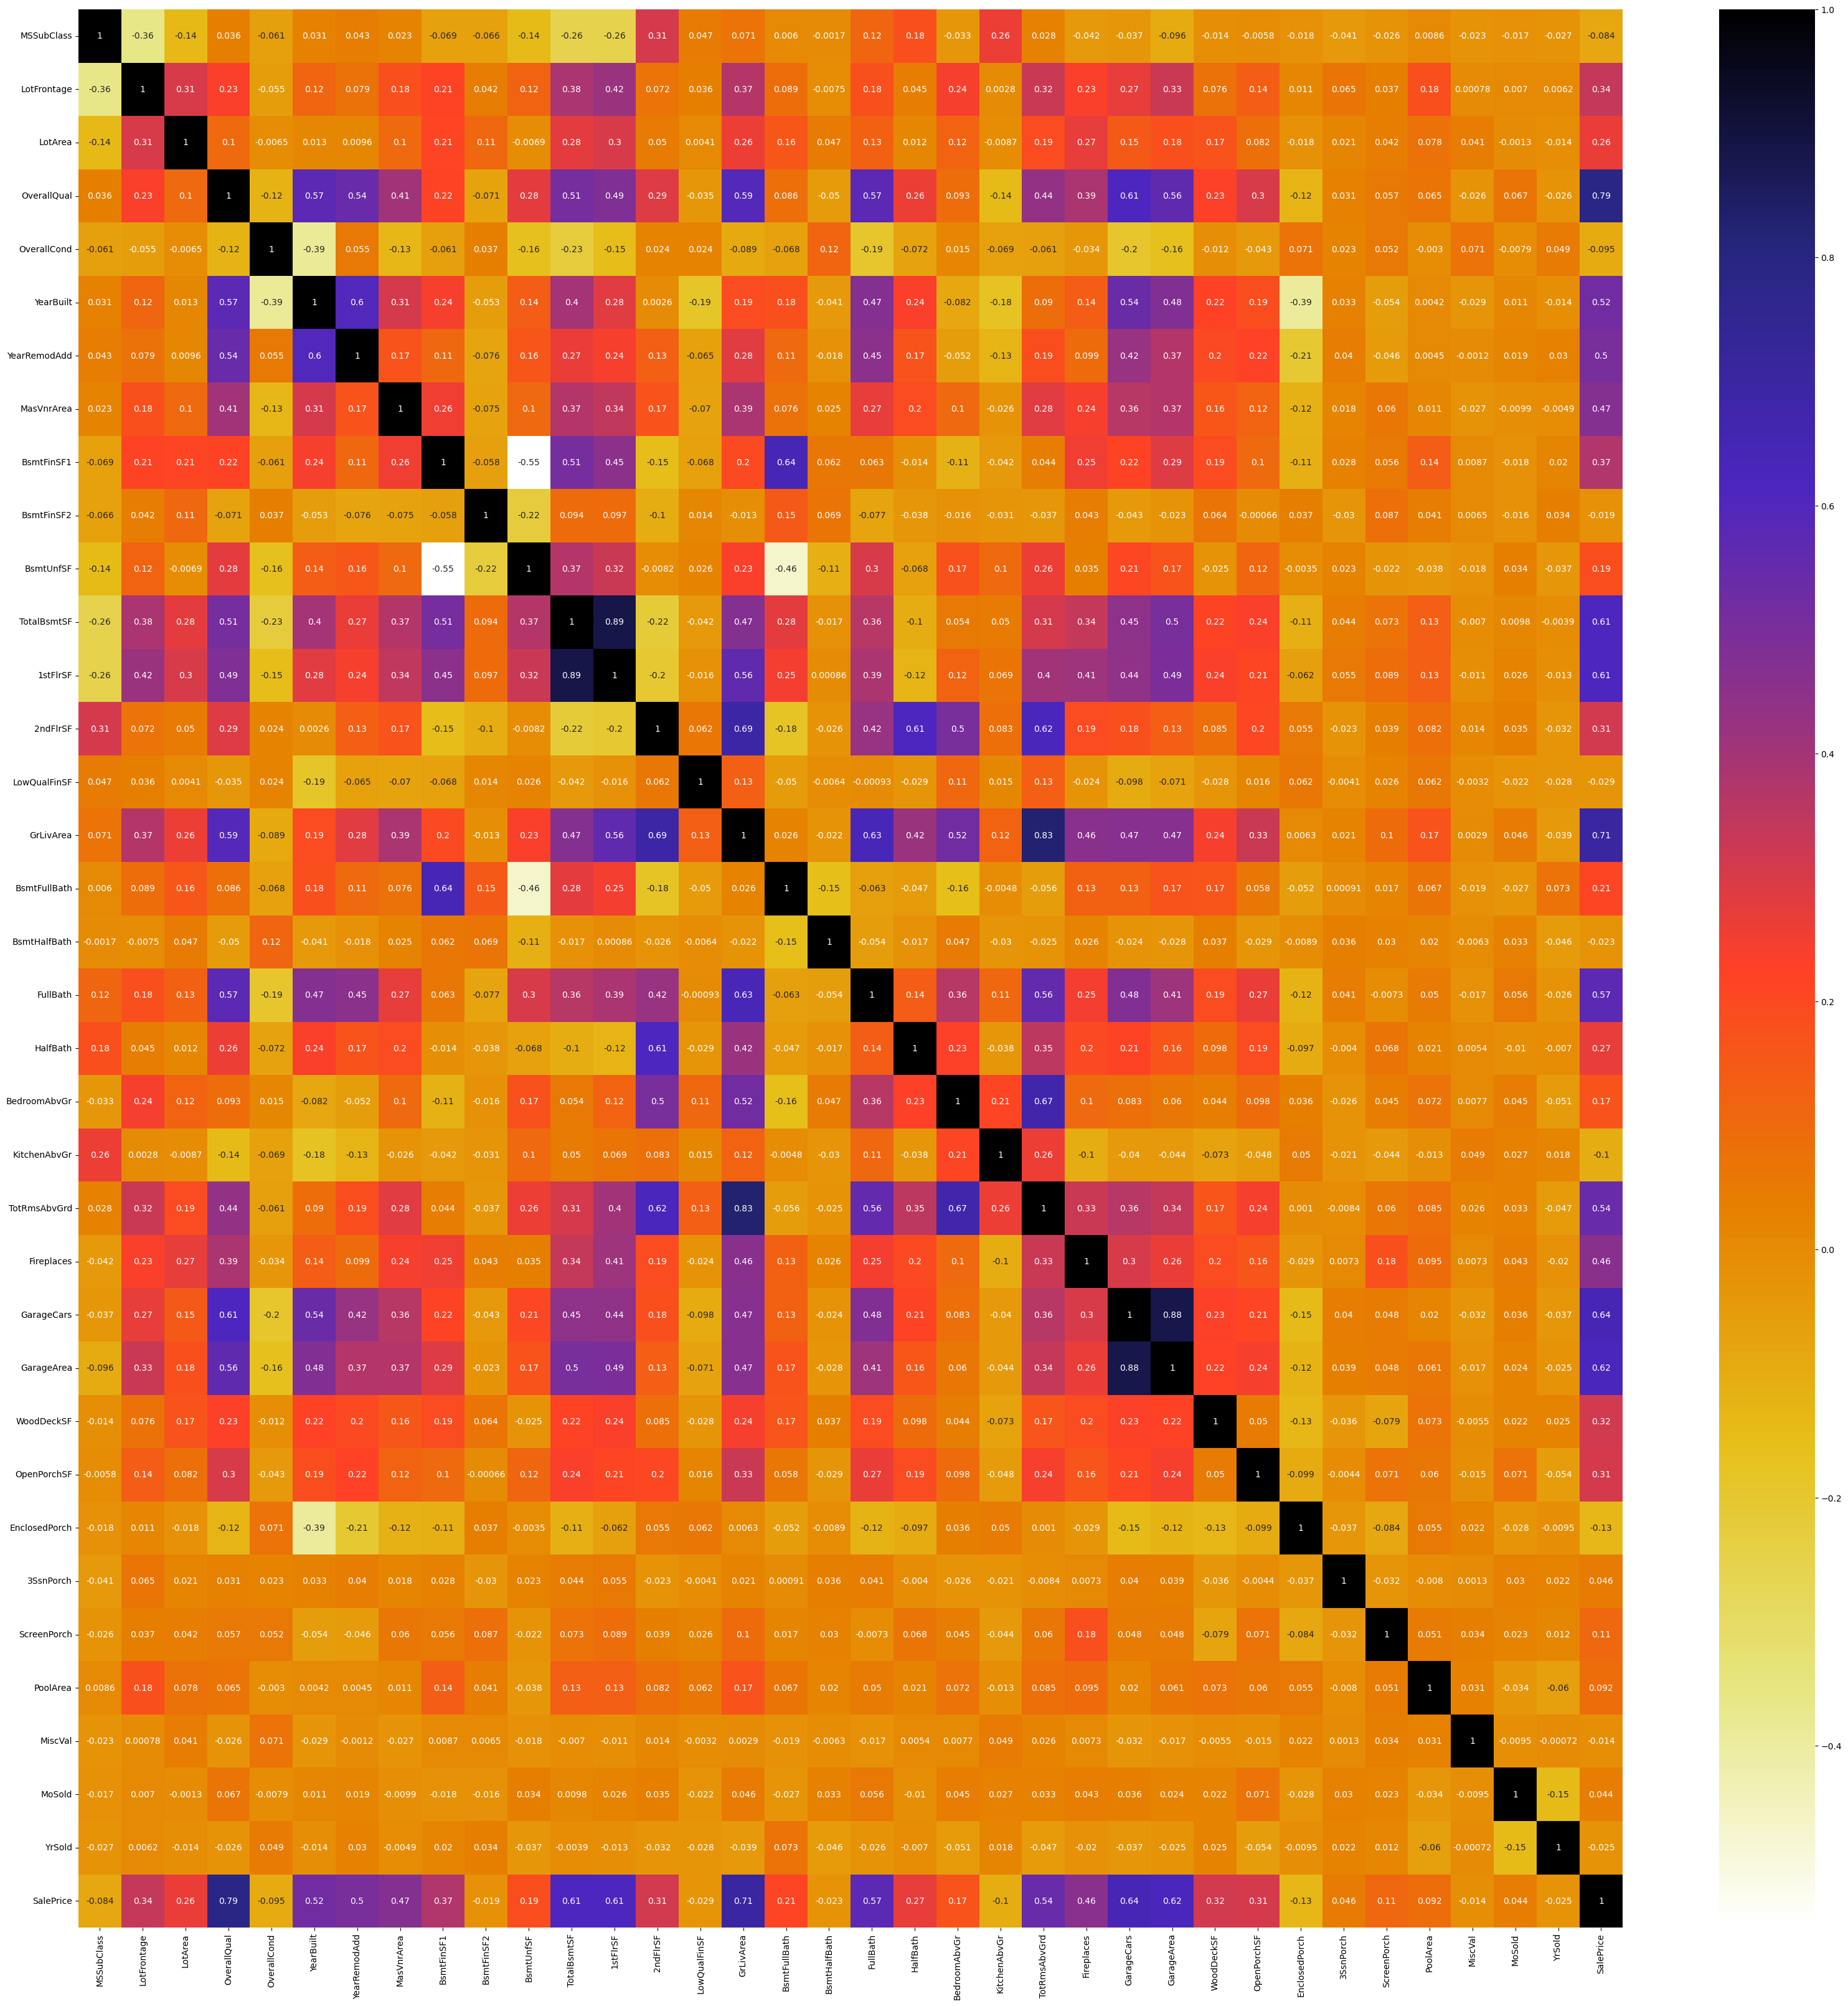

In [112]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(40,40))
cor = df.corr()
sns.heatmap(cor, annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [113]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [114]:
corr_features = correlation(x_train, 0.9)
len(set(corr_features))

1

In [115]:
corr_features

{'1stFlrSF'}

In [116]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)

In [117]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(x_train, y_train)
mutual_info

array([0.30126019, 0.2358781 , 0.19430702, 0.55231782, 0.09268655,
       0.36056365, 0.26751886, 0.09114048, 0.12626072, 0.0331935 ,
       0.16894653, 0.38713253, 0.21835027, 0.01171106, 0.49695618,
       0.0140363 , 0.00204646, 0.28362325, 0.05320069, 0.10135357,
       0.02521307, 0.22168833, 0.18753457, 0.35533552, 0.36915308,
       0.07857803, 0.15525325, 0.03328949, 0.        , 0.03232068,
       0.        , 0.00568987, 0.        , 0.        , 0.12300763,
       0.00094809, 0.05555162, 0.        , 0.        , 0.03245229,
       0.        , 0.493889  , 0.00196798, 0.03610047, 0.03057779,
       0.08677484, 0.06315331, 0.07635679, 0.02210777, 0.32792543,
       0.1702787 , 0.28285152, 0.0154858 , 0.06279632, 0.15400127,
       0.0144382 , 0.04083923, 0.00426887, 0.14828857, 0.1544833 ,
       0.1195715 , 0.        , 0.13296726, 0.03783082, 0.04015658,
       0.30339392, 0.00981852, 0.06198834, 0.14214622, 0.24912824,
       0.00569098, 0.02703585, 0.04960395])

In [118]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

OverallQual     0.552318
GrLivArea       0.496956
Neighborhood    0.493889
TotalBsmtSF     0.387133
GarageArea      0.369153
                  ...   
MoSold          0.000000
YrSold          0.000000
LandContour     0.000000
Utilities       0.000000
LandSlope       0.000000
Length: 73, dtype: float64

<AxesSubplot:>

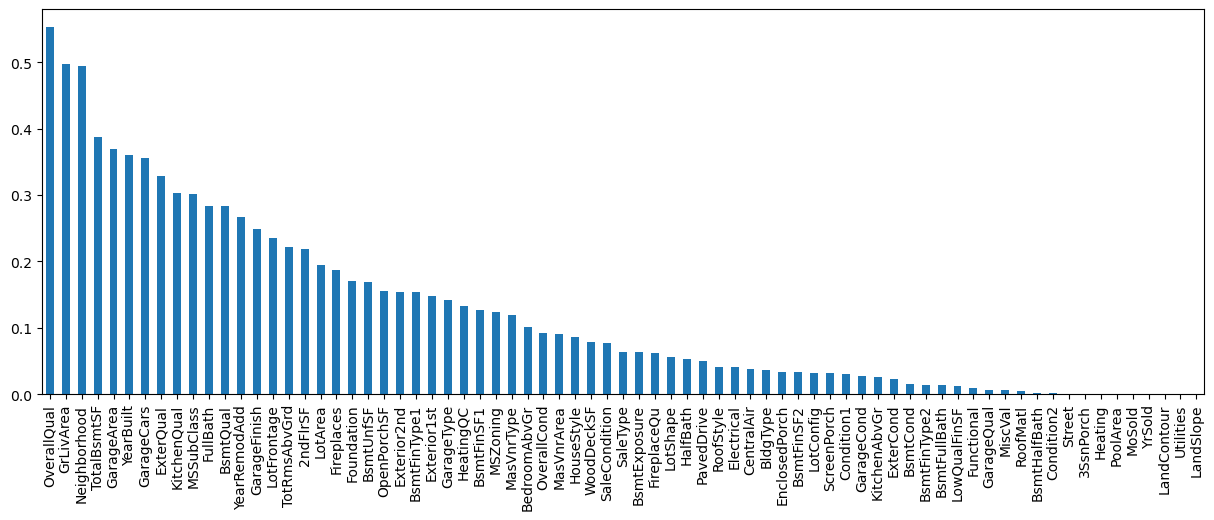

In [119]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [120]:
from sklearn.feature_selection import SelectPercentile

In [121]:
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(x_train, y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x0000017296340550>)

In [122]:
selected_top_columns.get_support()

array([ True,  True, False,  True, False,  True,  True, False, False,
       False, False,  True, False, False,  True, False, False,  True,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False])

In [123]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest( mutual_info_regression, k=15)
sel_five_cols.fit(x_train, y_train)

SelectKBest(k=15,
            score_func=<function mutual_info_regression at 0x0000017296340550>)

In [124]:
x_train.columns[sel_five_cols.get_support()]

Index(['MSSubClass', 'LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'TotalBsmtSF', 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea',
       'Neighborhood', 'ExterQual', 'BsmtQual', 'KitchenQual', 'GarageFinish'],
      dtype='object')

In [126]:
from sklearn.preprocessing import StandardScaler

In [127]:
# Preprocess the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Select the features using mutual information and SelectKBest
mi = mutual_info_regression(x_train, y_train)
kbest = SelectKBest(k=10)
x_train_selected = kbest.fit_transform(x_train, y_train)
x_test_selected = kbest.transform(x_test)

# Train the SVR model
model = SVR()
model.fit(x_train_selected, y_train)

# Evaluate the model
accuracy = model.score(x_test_selected, y_test)
print("Accuracy:", accuracy)

Accuracy: -0.05284734583485062


G:\New folder\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [38] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
G:\New folder\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [193]:
x = df.iloc[:, :70]
y = df.iloc[:, -1]

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [194]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [195]:
def get_score(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    return model.score(x_test,y_test)

In [196]:
get_score(lr_model,x_train,x_test,y_train,y_test)

1.0

In [197]:
#get_score(ridge_model,x_train_selected,x_test_selected,y_train,y_test)

In [198]:
#get_score(lasso_model,x_train_selected,x_test_selected,y_train,y_test)

In [199]:
get_score(knn_model,x_train,x_test,y_train,y_test)

0.9943111006767942

In [200]:
get_score(dt_model,x_train,x_test,y_train,y_test)

0.9896995244062492

In [201]:
get_score(gb_model,x_train,x_test,y_train,y_test)

0.9981336109587327

In [202]:
get_score(ada_bost_model,x_train,x_test,y_train,y_test)

0.9856066754530766

In [203]:
get_score(ext_reg_model,x_train,x_test,y_train,y_test)

0.999042637667696

In [204]:
get_score(sv_model,x_train,x_test,y_train,y_test)

-0.03488157045617668

In [205]:
get_score(xgb_model,x_train,x_test,y_train,y_test)

0.9979667918380477